In [1]:
from surprise import KNNWithMeans, KNNBasic, NMF
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split
import numpy as np
from tqdm import tqdm
import pandas as pd

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import json
import warnings
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [3]:
credits = pd.read_csv('tmdb_5000_credits.csv')
movies_tmdb = pd.read_csv('tmdb_5000_movies.csv')
movies_movielens = pd.read_csv('movies.csv')
ratings_movielens = pd.read_csv('ratings.csv')
tags_movielens=pd.read_csv('tags.csv')

Data preprocessing

In [4]:
credits

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast  \
0     [{"cast_id": 242, "character": "Jake Sully", "...   
1     [{"cast_id": 4, "character": "Captain Jack Spa...   
2     [{"cast_id": 1, "character": "James Bond", "cr...   
3     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4     [{"cast_id": 5, "character": "John Carter", "c...   
...                                                 ...   
4798  [{"cast_id": 1, "character": "El Mariachi", "c...   
4799  [{"cast_id": 1, "character": "Buzzy", "credit_...   
4800  [{"cast_id": 8, "character": "Oliver O\u2019To...   
4801  [{"cast_id": 3, "character": "Sam", "credit_id...   
4802  [{"cast_id": 3, "character": "Herself", "credi...   

                                                   crew  
0     [{"credit_id": "52fe48009251416c750aca23", "de...  
1     [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2     [{"credit_id": "54805967c3a36829b5002c41", "de...  
3     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
...                                                 ...  
4798  [{"credit_id": "52fe44eec3a36847f80b280b", "de...  
4799  [{"credit_id": "52fe487dc3a368484e0fb013", "de...  
4800  [{"credit_id": "52fe4df3c3a36847f8275ecf", "de...  
4801  [{"credit_id": "52fe4ad9c3a368484e16a36b", "de...  
4802  [{"credit_id": "58ce021b9251415a390165d9", "de...  

[4803 rows x 4 columns]

In [5]:
movies_tmdb

budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799       9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800          0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801          0                                                 []   
4802          0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
0                           http://www.avatarmovie.com/   19995   
1          http://disney.go.com/disneypictures/pirates/     285   
2           http://www.sonypictures.com/movies/spectre/  206647   
3                    http://www.thedarkknightrises.com/   49026   
4                  http://movies.disney.com/john-carter   49529   
...                                                 ...     ...   
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
0     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1     [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2     [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4     [{"id": 818, "name": "based on novel"}, {"id":...                en   
...                                                 ...               ...   
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                                 []                en   
4800  [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
4801                                                 []                en   
4802  [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                original_title  \
0                                       Avatar   
1     Pirates of the Caribbean: At World's End   
2                                      Spectre   
3                        The Dark Knight Rises   
4                                  John Carter   
...                                        ...   
4798                               El Mariachi   
4799                                 Newlyweds   
4800                 Signed, Sealed, Delivered   
4801                          Shanghai Calling   
4802                         My Date with Drew   

                                               overview  popularity  \
0     In the 22nd century, a paraplegic Marine is di...  150.437577   
1     Captain Barbossa, long believed to be dead, ha...  139.082615   
2     A cryptic message from Bond’s past sends him o...  107.376788   
3     Following the death of District Attorney Harve...  112.312950   
4     John Carter is a war-weary, former military ca...   43.926995   
...                                                 ...         ...   
4798  El Mariachi just wants to play his guitar and ...   14.269792   
4799  A newlywed couple's honeymoon is upended by th...    0.642552   
4800  "Signed, Sealed, Delivered" introduces a dedic...    1.444476   
4801  When ambitious New York attorney Sam is sent t...    0.857008   
4802  Ever since the second grade when he first saw ... 

In [6]:
tags_movielens

userId  movieId               tag   timestamp
0          2    60756             funny  1445714994
1          2    60756   Highly quotable  1445714996
2          2    60756      will ferrell  1445714992
3          2    89774      Boxing story  1445715207
4          2    89774               MMA  1445715200
...      ...      ...               ...         ...
3678     606     7382         for katie  1171234019
3679     606     7936           austere  1173392334
3680     610     3265            gun fu  1493843984
3681     610     3265  heroic bloodshed  1493843978
3682     610   168248  Heroic Bloodshed  1493844270

[3683 rows x 4 columns]

In [7]:
ratings_movielens

userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]

In [8]:
movies_movielens

movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                                          Comedy  
...                                           ...  
9737              Action|Animation|Comedy|Fantasy  
9738                     Animation|Comedy|Fantasy  
9739                                        Drama  
9740                             Action|Animation  
9741                                       Comedy  

[9742 rows x 3 columns]

In [9]:
movies_movielens = movies_movielens.rename(columns={'genres': 'genre'})

Working with genres

In [10]:
# changing the genres column from json to string
movies_tmdb['genres'] = movies_tmdb['genres'].apply(json.loads)
for index,i in zip(movies_tmdb.index,movies_tmdb['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies_tmdb.loc[index,'genres'] = str(list1)

# changing the keywords column from json to string
movies_tmdb['keywords'] = movies_tmdb['keywords'].apply(json.loads)
for index,i in zip(movies_tmdb.index,movies_tmdb['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies_tmdb.loc[index,'keywords'] = str(list1)
    
# changing the production_companies column from json to string
movies_tmdb['production_companies'] = movies_tmdb['production_companies'].apply(json.loads)
for index,i in zip(movies_tmdb.index,movies_tmdb['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies_tmdb.loc[index,'production_companies'] = str(list1)

# changing the cast column from json to string
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

# changing the crew column from json to string    
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [11]:
credits

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4798      9367                               El Mariachi   
4799     72766                                 Newlyweds   
4800    231617                 Signed, Sealed, Delivered   
4801    126186                          Shanghai Calling   
4802     25975                         My Date with Drew   

                                                   cast           director  
0     ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...      James Cameron  
1     ['Johnny Depp', 'Orlando Bloom', 'Keira Knight...     Gore Verbinski  
2     ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...         Sam Mendes  
3     ['Christian Bale', 'Michael Caine', 'Gary Oldm...  Christopher Nolan  
4     ['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...     Andrew Stanton  
...                                                 ...                ...  
4798  ['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...   Robert Rodriguez  
4799  ['Edward Burns', 'Kerry Bishé', 'Marsha Dietle...       Edward Burns  
4800  ['Eric Mabius', 'Kristin Booth', 'Crystal Lowe...        Scott Smith  
4801  ['Daniel Henney', 'Eliza Coupe', 'Bill Paxton'...        Daniel Hsia  
4802  ['Drew Barrymore', 'Brian Herzlinger', 'Corey ...   Brian Herzlinger  

[4803 rows x 4 columns]

In [12]:
movies_tmdb = movies_tmdb.merge(credits,left_on='id',right_on='movie_id',how='left')
movies_tmdb = movies_tmdb[['id','original_title','genres','cast','vote_average','director','keywords']]

In [13]:
movies_tmdb.head()

id                            original_title  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                              genres  \
0  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   
1                 ['Adventure', 'Fantasy', 'Action']   
2                   ['Action', 'Adventure', 'Crime']   
3           ['Action', 'Crime', 'Drama', 'Thriller']   
4         ['Action', 'Adventure', 'Science Fiction']   

                                                cast  vote_average  \
0  ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...           7.2   
1  ['Johnny Depp', 'Orlando Bloom', 'Keira Knight...           6.9   
2  ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...           6.3   
3  ['Christian Bale', 'Michael Caine', 'Gary Oldm...           7.6   
4  ['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...           6.1   

            director                                           keywords  
0      James Cameron  ['culture clash', 'future', 'space war', 'spac...  
1     Gore Verbinski  ['ocean', 'drug abuse', 'exotic island', 'east...  
2         Sam Mendes  ['spy', 'based on novel', 'secret agent', 'seq...  
3  Christopher Nolan  ['dc comics', 'crime fighter', 'terrorist', 's...  
4     Andrew Stanton  ['based on novel', 'mars', 'medallion', 'space...

In [14]:
duplicate_values = movies_tmdb.duplicated(subset='original_title', keep=False)

# Filter the DataFrame to keep only rows with unique values in the specified column
movies_tmdb = movies_tmdb[~duplicate_values]

In [15]:
movies_tmdb.head()

id                            original_title  \
0   19995                                    Avatar   
1     285  Pirates of the Caribbean: At World's End   
2  206647                                   Spectre   
3   49026                     The Dark Knight Rises   
4   49529                               John Carter   

                                              genres  \
0  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   
1                 ['Adventure', 'Fantasy', 'Action']   
2                   ['Action', 'Adventure', 'Crime']   
3           ['Action', 'Crime', 'Drama', 'Thriller']   
4         ['Action', 'Adventure', 'Science Fiction']   

                                                cast  vote_average  \
0  ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...           7.2   
1  ['Johnny Depp', 'Orlando Bloom', 'Keira Knight...           6.9   
2  ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...           6.3   
3  ['Christian Bale', 'Michael Caine', 'Gary Oldm...           7.6   
4  ['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...           6.1   

            director                                           keywords  
0      James Cameron  ['culture clash', 'future', 'space war', 'spac...  
1     Gore Verbinski  ['ocean', 'drug abuse', 'exotic island', 'east...  
2         Sam Mendes  ['spy', 'based on novel', 'secret agent', 'seq...  
3  Christopher Nolan  ['dc comics', 'crime fighter', 'terrorist', 's...  
4     Andrew Stanton  ['based on novel', 'mars', 'medallion', 'space...

In [16]:
duplicate_values = movies_movielens.duplicated(subset='title', keep=False)

# Filter the DataFrame to keep only rows with unique values in the specified column
movies_movielens = movies_movielens[~duplicate_values]

In [17]:
movies_movielens.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                         genre  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

In [18]:
movies_tmdb['original_title'] = movies_tmdb['original_title'].astype(str).str.lower().str.replace(' ', '')
movies_movielens['title_key'] = movies_movielens['title'].astype(str).str.lower().str.replace(' ', '')

In [19]:
movies_movielens['title_key']=movies_movielens.title_key.str.replace('(\(\d\d\d\d\))','',regex=True)
movies_movielens['title_key']=movies_movielens['title_key'].apply(lambda x:x.strip())
movies_movielens['title']=movies_movielens.title.str.replace('(\(\d\d\d\d\))','',regex=True)
movies_movielens['title']=movies_movielens['title'].apply(lambda x:x.strip())

In [20]:
movies_movielens.head()

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   

                                         genre               title_key  
0  Adventure|Animation|Children|Comedy|Fantasy                toystory  
1                   Adventure|Children|Fantasy                 jumanji  
2                               Comedy|Romance          grumpieroldmen  
3                         Comedy|Drama|Romance         waitingtoexhale  
4                                       Comedy  fatherofthebridepartii

In [21]:
common_rows = movies_tmdb[movies_tmdb['original_title'].isin(movies_movielens['title_key'].tolist())]

# Get the number of common rows
num_common_rows = len(common_rows)
common_rows.shape

(2656, 7)

Merge tmdb+ movielens

In [22]:
movies = pd.merge(movies_tmdb, movies_movielens, how='inner', left_on='original_title', right_on='title_key')

In [23]:
movies.head()

id                      original_title  \
0   19995                              avatar   
1     285  piratesofthecaribbean:atworld'send   
2  206647                             spectre   
3   49529                          johncarter   
4     559                         spider-man3   

                                              genres  \
0  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   
1                 ['Adventure', 'Fantasy', 'Action']   
2                   ['Action', 'Adventure', 'Crime']   
3         ['Action', 'Adventure', 'Science Fiction']   
4                 ['Fantasy', 'Action', 'Adventure']   

                                                cast  vote_average  \
0  ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...           7.2   
1  ['Johnny Depp', 'Orlando Bloom', 'Keira Knight...           6.9   
2  ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...           6.3   
3  ['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...           6.1   
4  ['Tobey Maguire', 'Kirsten Dunst', 'James Fran...           5.9   

         director                                           keywords  movieId  \
0   James Cameron  ['culture clash', 'future', 'space war', 'spac...    72998   
1  Gore Verbinski  ['ocean', 'drug abuse', 'exotic island', 'east...    53125   
2      Sam Mendes  ['spy', 'based on novel', 'secret agent', 'seq...   136020   
3  Andrew Stanton  ['based on novel', 'mars', 'medallion', 'space...    93363   
4       Sam Raimi  ['dual identity', 'amnesia', 'sandstorm', "lov...    52722   

                                      title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                               John Carter   
4                              Spider-Man 3   

                                   genre                           title_key  
0           Action|Adventure|Sci-Fi|IMAX                              avatar  
1        Action|Adventure|Comedy|Fantasy  piratesofthecaribbean:atworld'send  
2                 Action|Adventure|Crime                             spectre  
3           Action|Adventure|Sci-Fi|IMAX                          johncarter  
4  Action|Adventure|Sci-Fi|Thriller|IMAX                         spider-man3

In [24]:
movies = movies.drop(['title'], axis=1)

In [25]:
movies = movies.drop(['genre'], axis=1)

In [26]:
duplicate_values = movies.duplicated(subset='original_title', keep=False)

# Filter the DataFrame to keep only rows with unique values in the specified column
movies = movies[~duplicate_values]

In [27]:
movies.head()

id                      original_title  \
0   19995                              avatar   
1     285  piratesofthecaribbean:atworld'send   
2  206647                             spectre   
3   49529                          johncarter   
4     559                         spider-man3   

                                              genres  \
0  ['Action', 'Adventure', 'Fantasy', 'Science Fi...   
1                 ['Adventure', 'Fantasy', 'Action']   
2                   ['Action', 'Adventure', 'Crime']   
3         ['Action', 'Adventure', 'Science Fiction']   
4                 ['Fantasy', 'Action', 'Adventure']   

                                                cast  vote_average  \
0  ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...           7.2   
1  ['Johnny Depp', 'Orlando Bloom', 'Keira Knight...           6.9   
2  ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...           6.3   
3  ['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...           6.1   
4  ['Tobey Maguire', 'Kirsten Dunst', 'James Fran...           5.9   

         director                                           keywords  movieId  \
0   James Cameron  ['culture clash', 'future', 'space war', 'spac...    72998   
1  Gore Verbinski  ['ocean', 'drug abuse', 'exotic island', 'east...    53125   
2      Sam Mendes  ['spy', 'based on novel', 'secret agent', 'seq...   136020   
3  Andrew Stanton  ['based on novel', 'mars', 'medallion', 'space...    93363   
4       Sam Raimi  ['dual identity', 'amnesia', 'sandstorm', "lov...    52722   

                            title_key  
0                              avatar  
1  piratesofthecaribbean:atworld'send  
2                             spectre  
3                          johncarter  
4                         spider-man3

In [28]:
rating=ratings_movielens[ratings_movielens['movieId'].isin(movies['movieId'].tolist())]
rating.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
5       1       70     3.0  964982400
6       1      101     5.0  964980868
7       1      110     4.0  964982176
8       1      151     5.0  964984041

In [29]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

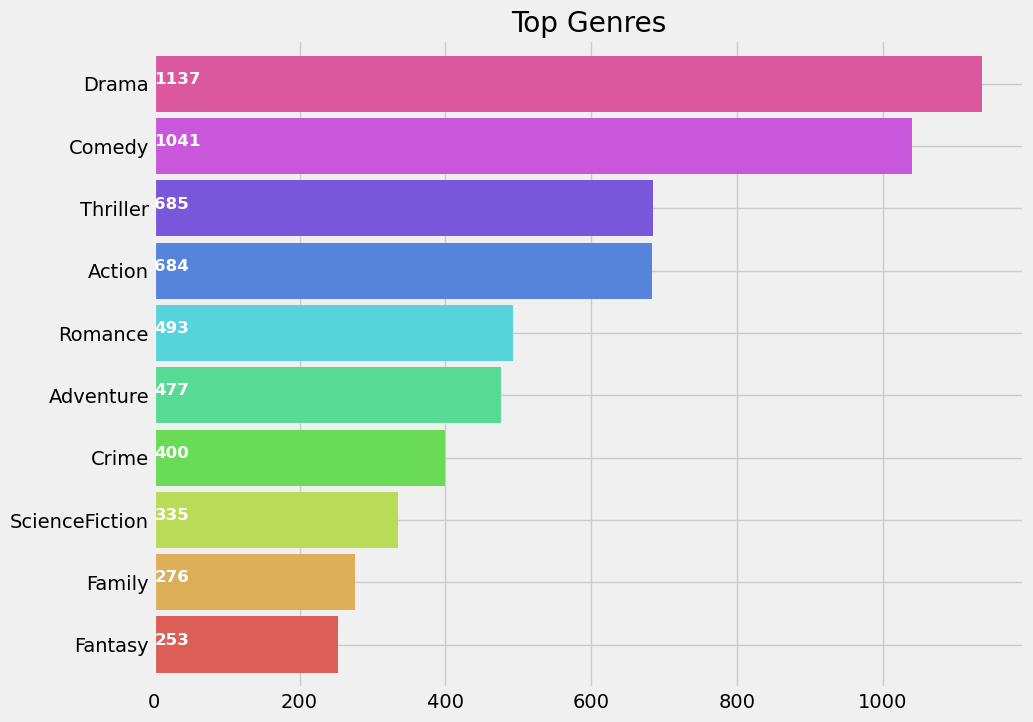

In [30]:
plt.subplots(figsize=(10,8))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

Genre list

In [31]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [32]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Animation',
 'Family',
 'Thriller',
 'Comedy',
 'Drama']

Cast of actors

In [33]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

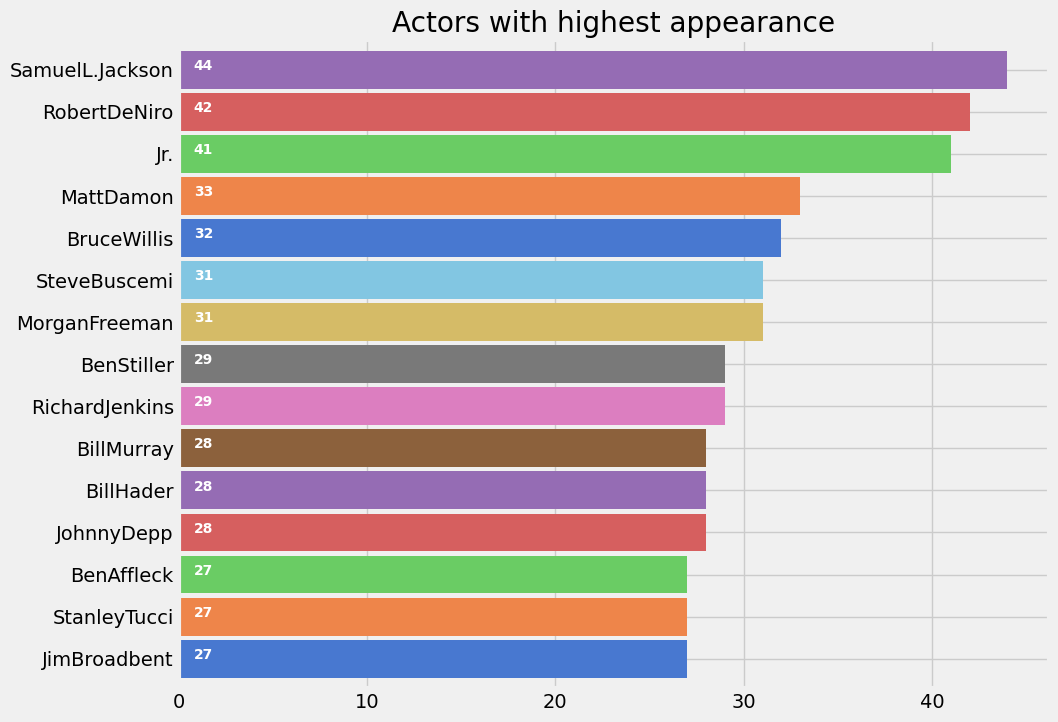

In [34]:
plt.subplots(figsize=(10,8))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Actors with highest appearance')
plt.show()

In [35]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    list2.sort()
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
# for i,j in zip(movies['cast'],movies.index):
#     list2 = []
#     list2 = i
#     list2.sort()
#     movies.loc[j,'cast'] = str(list2)
# movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [36]:
list2

['AnandUpadhyaya', 'CaseyGooden', 'DavidSullivan', 'ShaneCarruth']

In [37]:
# for i,j in zip(movies['genres'],movies.index):
#     list2=[]
#     list2=i
#     list2.sort()
#     movies.loc[j,'genres']=str(list2)
# movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
# movies['genres'] = movies['genres'].str.split(',')

In [38]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for actor in cast:
        if actor not in castList:
            castList.append(actor)
castList[:10]

['SamWorthington',
 'SigourneyWeaver',
 'StephenLang',
 'ZoeSaldana',
 'JohnnyDepp',
 'KeiraKnightley',
 'OrlandoBloom',
 'StellanSkarsgård',
 'ChristophWaltz',
 'DanielCraig']

In [39]:
castList

['SamWorthington',
 'SigourneyWeaver',
 'StephenLang',
 'ZoeSaldana',
 'JohnnyDepp',
 'KeiraKnightley',
 'OrlandoBloom',
 'StellanSkarsgård',
 'ChristophWaltz',
 'DanielCraig',
 'LéaSeydoux',
 'RalphFiennes',
 'LynnCollins',
 'SamanthaMorton',
 'TaylorKitsch',
 'WillemDafoe',
 'JamesFranco',
 'KirstenDunst',
 'ThomasHadenChurch',
 'TobeyMaguire',
 'DonnaMurphy',
 'MandyMoore',
 'RonPerlman',
 'ZacharyLevi',
 'ChrisEvans',
 'ChrisHemsworth',
 'MarkRuffalo',
 'RobertDowneyJr.',
 'DanielRadcliffe',
 'EmmaWatson',
 'RupertGrint',
 'TomFelton',
 'AmyAdams',
 'BenAffleck',
 'GalGadot',
 'HenryCavill',
 'BrandonRouth',
 'JamesMarsden',
 'KateBosworth',
 'KevinSpacey',
 'JudiDench',
 'MathieuAmalric',
 'OlgaKurylenko',
 'KevinCostner',
 'MichaelShannon',
 'IanMcShane',
 'KevinMcNally',
 'PenélopeCruz',
 'IanMcKellen',
 'KenStott',
 'MartinFreeman',
 'RichardArmitage',
 'ScarlettJohansson',
 'SebastianStan',
 'AlexanderSkarsgård',
 'BrooklynDecker',
 'Rihanna',
 'BryceDallasHoward',
 'ChrisPrat

Director column

In [40]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

In [41]:
movies.head()

id                      original_title  \
0   19995                              avatar   
1     285  piratesofthecaribbean:atworld'send   
2  206647                             spectre   
3   49529                          johncarter   
4     559                         spider-man3   

                                         genres  \
0  [Action, Adventure, Fantasy, ScienceFiction]   
1                  [Action, Adventure, Fantasy]   
2                    [Action, Adventure, Crime]   
3           [Action, Adventure, ScienceFiction]   
4                  [Action, Adventure, Fantasy]   

                                                cast  vote_average  \
0  [SamWorthington, SigourneyWeaver, StephenLang,...           7.2   
1  [JohnnyDepp, KeiraKnightley, OrlandoBloom, Ste...           6.9   
2  [ChristophWaltz, DanielCraig, LéaSeydoux, Ralp...           6.3   
3  [LynnCollins, SamanthaMorton, TaylorKitsch, Wi...           6.1   
4  [JamesFranco, KirstenDunst, ThomasHadenChurch,...           5.9   

         director                                           keywords  movieId  \
0   James Cameron  ['culture clash', 'future', 'space war', 'spac...    72998   
1  Gore Verbinski  ['ocean', 'drug abuse', 'exotic island', 'east...    53125   
2      Sam Mendes  ['spy', 'based on novel', 'secret agent', 'seq...   136020   
3  Andrew Stanton  ['based on novel', 'mars', 'medallion', 'space...    93363   
4       Sam Raimi  ['dual identity', 'amnesia', 'sandstorm', "lov...    52722   

                            title_key  
0                              avatar  
1  piratesofthecaribbean:atworld'send  
2                             spectre  
3                          johncarter  
4                         spider-man3

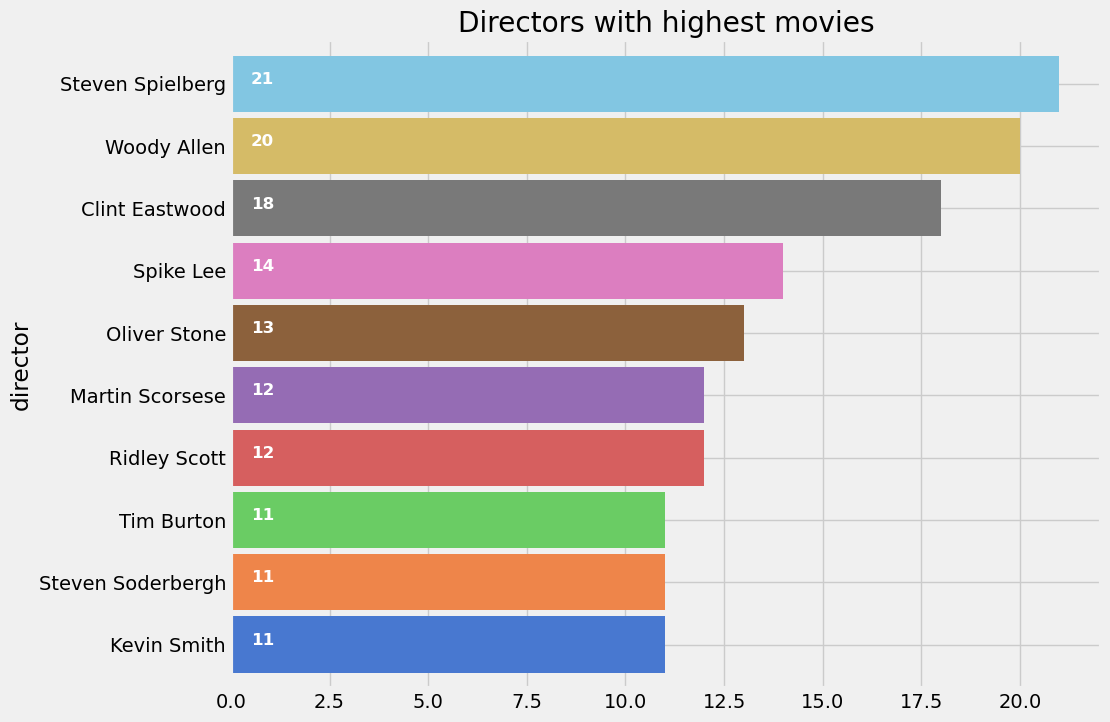

In [42]:
plt.subplots(figsize=(10,8))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

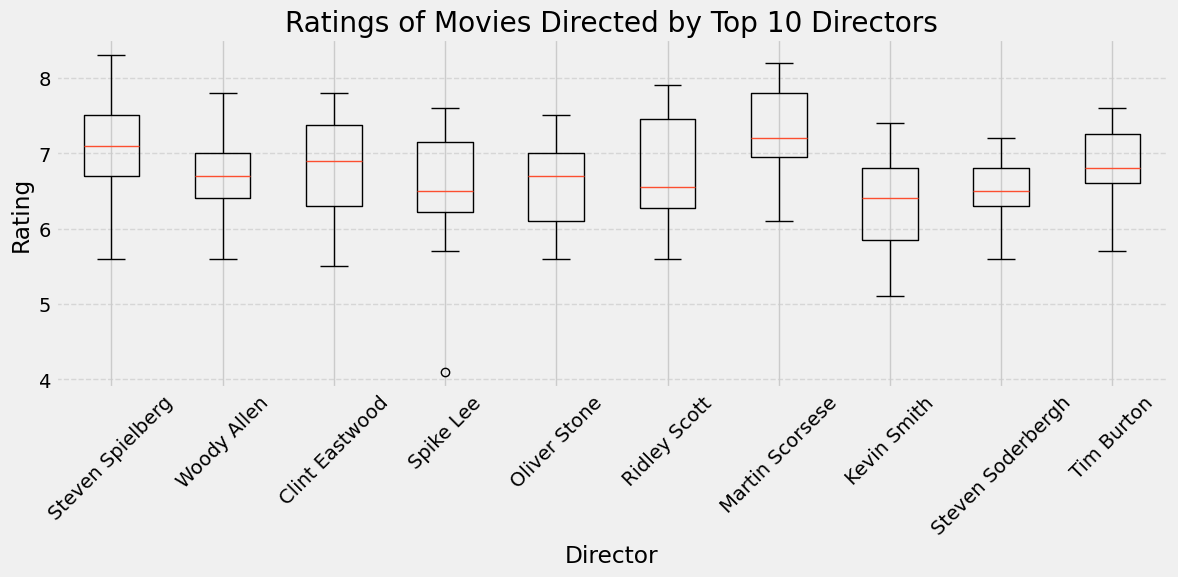

In [43]:
director_movie_counts = movies['director'].value_counts()

# Select the top 10 directors based on movie count
top_10_directors = director_movie_counts.head(10).index

# Filter the data to include only movies directed by the top 10 directors
filtered_df = movies[movies['director'].isin(top_10_directors)]

# Create a boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([filtered_df[filtered_df['director'] == director]['vote_average'] for director in top_10_directors], labels=top_10_directors)
plt.title('Ratings of Movies Directed by Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [44]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [45]:
directorList

['James Cameron',
 'Gore Verbinski',
 'Sam Mendes',
 'Andrew Stanton',
 'Sam Raimi',
 'Byron Howard',
 'Joss Whedon',
 'David Yates',
 'Zack Snyder',
 'Bryan Singer',
 'Marc Forster',
 'Rob Marshall',
 'Peter Jackson',
 'Anthony Russo',
 'Peter Berg',
 'Colin Trevorrow',
 'Shane Black',
 'Brett Ratner',
 'Dan Scanlon',
 'Michael Bay',
 'Marc Webb',
 'Joseph Kosinski',
 'John Lasseter',
 'Martin Campbell',
 'Lee Unkrich',
 'McG',
 'James Wan',
 'J.J. Abrams',
 'Mike Newell',
 'Guillermo del Toro',
 'Steven Spielberg',
 'Peter Sohn',
 'Brenda Chapman',
 'Justin Lin',
 'Roland Emmerich',
 'Lilly Wachowski',
 'Pete Docter',
 'Martin Scorsese',
 'Barry Sonnenfeld',
 'David Ayer',
 'Tom Shadyac',
 'Doug Liman',
 'Kevin Reynolds',
 'Stephen Sommers',
 'Jon Favreau',
 'Rupert Sanders',
 'Robert Stromberg',
 'Matt Reeves',
 'Roland Joffé',
 'Carl Rinsch',
 'Brad Bird',
 'Chris Williams',
 'Rich Moore',
 'Chris Sanders',
 'Jonathan Mostow',
 'James Gunn',
 'Christopher Nolan',
 'Matthew Vaughn',

In [46]:
movies.shape

(2537, 9)

In [47]:
movies

id                      original_title  \
0      19995                              avatar   
1        285  piratesofthecaribbean:atworld'send   
2     206647                             spectre   
3      49529                          johncarter   
4        559                         spider-man3   
...      ...                                 ...   
2783   14585                   inthecompanyofmen   
2784   38780                             rampage   
2785   14022                             slacker   
2786     692                       pinkflamingos   
2787   14337                              primer   

                                            genres  \
0     [Action, Adventure, Fantasy, ScienceFiction]   
1                     [Action, Adventure, Fantasy]   
2                       [Action, Adventure, Crime]   
3              [Action, Adventure, ScienceFiction]   
4                     [Action, Adventure, Fantasy]   
...                                            ...   
2783                               [Comedy, Drama]   
2784              [Action, Crime, Drama, Thriller]   
2785                                      [Comedy]   
2786                       [Comedy, Crime, Horror]   
2787             [Drama, ScienceFiction, Thriller]   

                                                   cast  vote_average  \
0     [SamWorthington, SigourneyWeaver, StephenLang,...           7.2   
1     [JohnnyDepp, KeiraKnightley, OrlandoBloom, Ste...           6.9   
2     [ChristophWaltz, DanielCraig, LéaSeydoux, Ralp...           6.3   
3     [LynnCollins, SamanthaMorton, TaylorKitsch, Wi...           6.1   
4     [JamesFranco, KirstenDunst, ThomasHadenChurch,...           5.9   
...                                                 ...           ...   
2783  [AaronEckhart, MattMalloy, MichaelMartin, Stac...           6.8   
2784  [BrendanFletcher, LyndaBoyd, MichaelParé, Shau...           6.0   
2785                      [MarkJames, RichardLinklater]           6.4   
2786  [DavidLochary, Divine, MaryVivianPearce, MinkS...           6.2   
2787  [AnandUpadhyaya, CaseyGooden, DavidSullivan, S...           6.9   

               director                                           keywords  \
0         James Cameron  ['culture clash', 'future', 'space war', 'spac...   
1        Gore Verbinski  ['ocean', 'drug abuse', 'exotic island', 'east...   
2            Sam Mendes  ['spy', 'based on novel', 'secret agent', 'seq...   
3        Andrew Stanton  ['based on novel', 'mars', 'medallion', 'space...   
4             Sam Raimi  ['dual identity', 'amnesia', 'sandstorm', "lov...   
...                 ...                                                ...   
2783        Neil LaBute  ['office', 'love', 'independent film', 'secret...   
2784           Uwe Boll           ['rampage', 'massacre', 'killing spree']   
2785  Richard Linklater  ['moon', 'philosophy', 'burglar', 'texas', 'dr...   
2786        John Waters  ['gay', 'trailer park', 'pop culture', 'drug d...   
2787      Shane Carruth  ['distrust', 'garage', 'identity crisis', 'tim...   

      movieId                           title_key  
0       72998                              avatar  
1       53125  piratesofthecaribbean:atworld'send  
2      136020                             spectre  
3       93363                          johncarter  
4       52722                         spider-man3  
...       ...                                 ...  
2783     1594                   inthecompanyofmen  
2784   186587                             rampage  
2785     6978                             slacker  
2786     2361                       pinkflamingos  
2787     8914                              primer  

[2537 rows x 9 columns]

In [48]:
MLmovie=pd.read_csv('movies.csv')
move3 = pd.merge(MLmovie[['movieId', 'title']], movies, on='movieId')
move3.head()

movieId                    title     id   original_title  \
0        1         Toy Story (1995)    862         toystory   
1       10         GoldenEye (1995)    710        goldeneye   
2       14             Nixon (1995)  10858            nixon   
3       15  Cutthroat Island (1995)   1408  cutthroatisland   
4       16            Casino (1995)    524           casino   

                          genres  \
0    [Animation, Comedy, Family]   
1  [Action, Adventure, Thriller]   
2               [Drama, History]   
3            [Action, Adventure]   
4                 [Crime, Drama]   

                                                cast  vote_average  \
0        [DonRickles, JimVarney, TimAllen, TomHanks]           7.7   
1  [FamkeJanssen, IzabellaScorupco, PierceBrosnan...           6.6   
2  [AnthonyHopkins, EdHarris, JoanAllen, PowersBo...           7.1   
3  [FrankLangella, GeenaDavis, MatthewModine, Mau...           5.7   
4  [JamesWoods, JoePesci, RobertDeNiro, SharonStone]           7.8   

          director                                           keywords  \
0    John Lasseter  ['jealousy', 'toy', 'boy', 'friendship', 'frie...   
1  Martin Campbell  ['cuba', 'falsely accused', 'secret identity',...   
2     Oliver Stone  ['usa president', 'presidential election', 'wa...   
3     Renny Harlin  ['exotic island', 'treasure', 'map', 'ship', '...   
4  Martin Scorsese  ['poker', 'drug abuse', '1970s', 'overdose', '...   

         title_key  
0         toystory  
1        goldeneye  
2            nixon  
3  cutthroatisland  
4           casino

In [49]:
movies=move3
movies.head()

movieId                    title     id   original_title  \
0        1         Toy Story (1995)    862         toystory   
1       10         GoldenEye (1995)    710        goldeneye   
2       14             Nixon (1995)  10858            nixon   
3       15  Cutthroat Island (1995)   1408  cutthroatisland   
4       16            Casino (1995)    524           casino   

                          genres  \
0    [Animation, Comedy, Family]   
1  [Action, Adventure, Thriller]   
2               [Drama, History]   
3            [Action, Adventure]   
4                 [Crime, Drama]   

                                                cast  vote_average  \
0        [DonRickles, JimVarney, TimAllen, TomHanks]           7.7   
1  [FamkeJanssen, IzabellaScorupco, PierceBrosnan...           6.6   
2  [AnthonyHopkins, EdHarris, JoanAllen, PowersBo...           7.1   
3  [FrankLangella, GeenaDavis, MatthewModine, Mau...           5.7   
4  [JamesWoods, JoePesci, RobertDeNiro, SharonStone]           7.8   

          director                                           keywords  \
0    John Lasseter  ['jealousy', 'toy', 'boy', 'friendship', 'frie...   
1  Martin Campbell  ['cuba', 'falsely accused', 'secret identity',...   
2     Oliver Stone  ['usa president', 'presidential election', 'wa...   
3     Renny Harlin  ['exotic island', 'treasure', 'map', 'ship', '...   
4  Martin Scorsese  ['poker', 'drug abuse', '1970s', 'overdose', '...   

         title_key  
0         toystory  
1        goldeneye  
2            nixon  
3  cutthroatisland  
4           casino

In [50]:
movies.shape

(2537, 10)

Keywords

In [51]:
movies.drop(columns=['original_title'],inplace=True)
movies.rename(columns={"title_x": "original_title"}, inplace=True)

In [52]:
movies.head()

movieId                    title     id                         genres  \
0        1         Toy Story (1995)    862    [Animation, Comedy, Family]   
1       10         GoldenEye (1995)    710  [Action, Adventure, Thriller]   
2       14             Nixon (1995)  10858               [Drama, History]   
3       15  Cutthroat Island (1995)   1408            [Action, Adventure]   
4       16            Casino (1995)    524                 [Crime, Drama]   

                                                cast  vote_average  \
0        [DonRickles, JimVarney, TimAllen, TomHanks]           7.7   
1  [FamkeJanssen, IzabellaScorupco, PierceBrosnan...           6.6   
2  [AnthonyHopkins, EdHarris, JoanAllen, PowersBo...           7.1   
3  [FrankLangella, GeenaDavis, MatthewModine, Mau...           5.7   
4  [JamesWoods, JoePesci, RobertDeNiro, SharonStone]           7.8   

          director                                           keywords  \
0    John Lasseter  ['jealousy', 'toy', 'boy', 'friendship', 'frie...   
1  Martin Campbell  ['cuba', 'falsely accused', 'secret identity',...   
2     Oliver Stone  ['usa president', 'presidential election', 'wa...   
3     Renny Harlin  ['exotic island', 'treasure', 'map', 'ship', '...   
4  Martin Scorsese  ['poker', 'drug abuse', '1970s', 'overdose', '...   

         title_key  
0         toystory  
1        goldeneye  
2            nixon  
3  cutthroatisland  
4           casino

In [53]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

Worlcloud

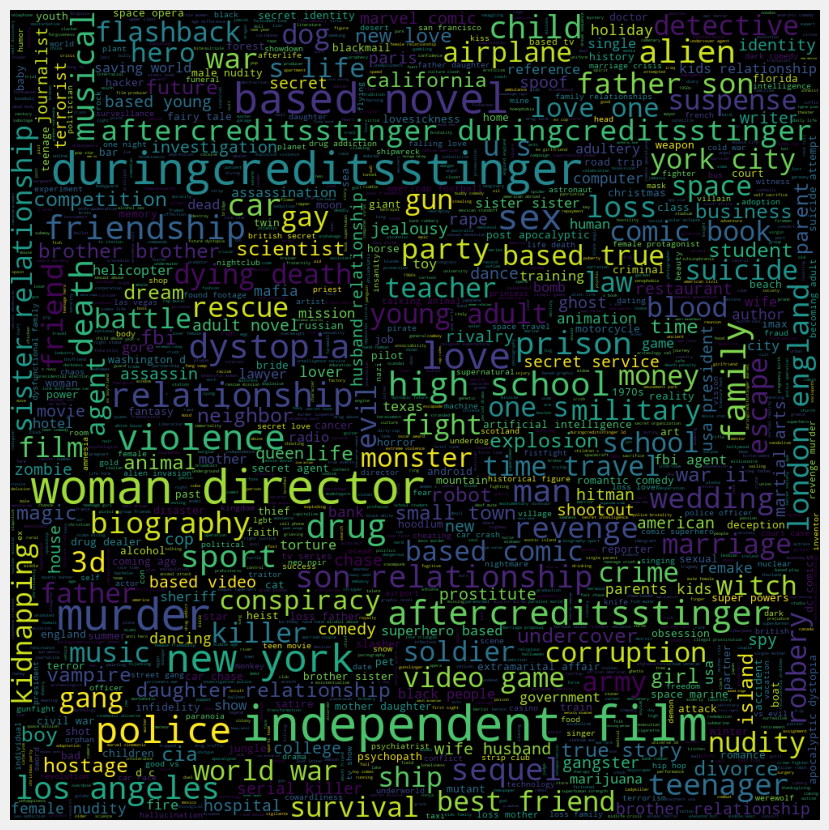

In [54]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [55]:
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'keywords'] = str(list2)
movies['keywords'] = movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords'] = movies['keywords'].str.split(',')

In [56]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [57]:
movies.head()

movieId                    title     id                         genres  \
0        1         Toy Story (1995)    862    [Animation, Comedy, Family]   
1       10         GoldenEye (1995)    710  [Action, Adventure, Thriller]   
2       14             Nixon (1995)  10858               [Drama, History]   
3       15  Cutthroat Island (1995)   1408            [Action, Adventure]   
4       16            Casino (1995)    524                 [Crime, Drama]   

                                                cast  vote_average  \
0        [DonRickles, JimVarney, TimAllen, TomHanks]           7.7   
1  [FamkeJanssen, IzabellaScorupco, PierceBrosnan...           6.6   
2  [AnthonyHopkins, EdHarris, JoanAllen, PowersBo...           7.1   
3  [FrankLangella, GeenaDavis, MatthewModine, Mau...           5.7   
4  [JamesWoods, JoePesci, RobertDeNiro, SharonStone]           7.8   

          director                                           keywords  \
0    John Lasseter  [boy, boynextdoor, friends, friendship, jealou...   
1  Martin Campbell  [computervirus, cossack, cuba, ejectionseat, e...   
2     Oliver Stone  [biography, government, historicalfigure, pres...   
3     Renny Harlin  [exoticisland, map, pirate, scalp, ship, treas...   
4  Martin Scorsese  [1970s, drugabuse, illegalprostitution, overdo...   

         title_key  
0         toystory  
1        goldeneye  
2            nixon  
3  cutthroatisland  
4           casino

In [58]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       2537 non-null   int64  
 1   title         2537 non-null   object 
 2   id            2537 non-null   int64  
 3   genres        2537 non-null   object 
 4   cast          2537 non-null   object 
 5   vote_average  2537 non-null   float64
 6   director      2537 non-null   object 
 7   keywords      2537 non-null   object 
 8   title_key     2537 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 178.5+ KB


In [59]:
print(f'Directors:\n{directorList[:5]},\nKey words:\n{words_list[:5]},\nGenres:\n{genreList[:5]},\nActors:\n{castList[:5]}')

Directors:
['James Cameron', 'Gore Verbinski', 'Sam Mendes', 'Andrew Stanton', 'Sam Raimi'],
Key words:
['boy', 'boynextdoor', 'friends', 'friendship', 'jealousy'],
Genres:
['Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime'],
Actors:
['SamWorthington', 'SigourneyWeaver', 'StephenLang', 'ZoeSaldana', 'JohnnyDepp']


In [60]:
movies.head()

movieId                    title     id                         genres  \
0        1         Toy Story (1995)    862    [Animation, Comedy, Family]   
1       10         GoldenEye (1995)    710  [Action, Adventure, Thriller]   
2       14             Nixon (1995)  10858               [Drama, History]   
3       15  Cutthroat Island (1995)   1408            [Action, Adventure]   
4       16            Casino (1995)    524                 [Crime, Drama]   

                                                cast  vote_average  \
0        [DonRickles, JimVarney, TimAllen, TomHanks]           7.7   
1  [FamkeJanssen, IzabellaScorupco, PierceBrosnan...           6.6   
2  [AnthonyHopkins, EdHarris, JoanAllen, PowersBo...           7.1   
3  [FrankLangella, GeenaDavis, MatthewModine, Mau...           5.7   
4  [JamesWoods, JoePesci, RobertDeNiro, SharonStone]           7.8   

          director                                           keywords  \
0    John Lasseter  [boy, boynextdoor, friends, friendship, jealou...   
1  Martin Campbell  [computervirus, cossack, cuba, ejectionseat, e...   
2     Oliver Stone  [biography, government, historicalfigure, pres...   
3     Renny Harlin  [exoticisland, map, pirate, scalp, ship, treas...   
4  Martin Scorsese  [1970s, drugabuse, illegalprostitution, overdo...   

         title_key  
0         toystory  
1        goldeneye  
2            nixon  
3  cutthroatisland  
4           casino

Using bert to get embeddings

In [61]:
from transformers import BertTokenizer, BertModel

In [62]:
import torch

In [63]:
device = torch.device('cuda')

In [64]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = BertModel.from_pretrained('bert-base-cased').to(device)

In [65]:
movies.columns

Index(['movieId', 'title', 'id', 'genres', 'cast', 'vote_average', 'director',
       'keywords', 'title_key'],
      dtype='object')

In [66]:
tokenized = [tokenizer.encode(x, add_special_tokens=256) for x in tqdm(movies['genres'])]
padded = np.array([i + [0]*(256-len(i)) for i in tokenized])
attention_mask = np.where(padded != 0, 1, 0)

  0%|          | 0/2537 [00:00<?, ?it/s]

100%|██████████| 2537/2537 [00:00<00:00, 25630.22it/s]


In [67]:
attention_mask.shape

(2537, 256)

In [68]:
padded.shape

(2537, 256)

In [69]:
input_ids = torch.tensor(padded).to(device)
attention_mask = torch.tensor(attention_mask).to(device)
batch_size = 2
features_list = []

In [70]:
for i in tqdm(range(0, len(input_ids), batch_size)):
    batch_input_ids = input_ids[i:i+batch_size]
    batch_attention_mask = attention_mask[i:i+batch_size]
    with torch.no_grad():
        last_hidden_states = bert_model(batch_input_ids, attention_mask=batch_attention_mask)
    features = last_hidden_states[0][:,0,:].cpu().numpy()
    features_list.append(features)

  0%|          | 0/1269 [00:00<?, ?it/s]

100%|██████████| 1269/1269 [01:08<00:00, 18.57it/s]


Save full architecture of transformer

In [71]:
torch.save(bert_model.state_dict(), 'bert_model_finetuned_genres.pth')

In [72]:
all_features = np.concatenate(features_list, axis=0)

In [73]:
all_features.shape

(2537, 768)

In [74]:
genres_bert=pd.DataFrame(all_features)

In [75]:
genres_bert.to_csv('genres_bert.csv', index=False)

In [76]:
genres_bert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Columns: 768 entries, 0 to 767
dtypes: float32(768)
memory usage: 7.4 MB


Try to reduce dimensionality

In [77]:
import umap
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD , PCA

Standard Scaler

In [78]:
%%time
scaler = StandardScaler()
scaler.fit(genres_bert)

scaled_emb = scaler.transform(genres_bert)

CPU times: total: 46.9 ms
Wall time: 51 ms


Make Genre Matrix to aggregate decomposition models

In [79]:
# Получаем список всех жанров
list1 = []
for i in movies['genres']:
    list1.extend(i)
unique_genres = pd.DataFrame(set(list1), columns=['genre'])

# Создаем матрицу бинарных признаков для жанров
genre_matrix = movies['genres'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)
genre_matrix.columns = unique_genres['genre']

In [80]:
unique_genres

genre
0          Romance
1          Foreign
2            Crime
3           Horror
4         Thriller
5        Animation
6            Music
7            Drama
8          Fantasy
9          TVMovie
10     Documentary
11       Adventure
12         History
13             War
14          Family
15          Comedy
16         Mystery
17  ScienceFiction
18         Western
19          Action

In [81]:
genre_matrix

genre  Romance  Foreign  Crime  Horror  Thriller  Animation  Music  Drama  \
0            1        1      1       0         0          0      0      0   
1            0        0      0       1         1          1      0      0   
2            0        0      0       0         0          0      1      1   
3            0        0      0       1         1          0      0      0   
4            0        0      0       0         0          0      1      0   
...        ...      ...    ...     ...       ...        ...    ...    ...   
2532         0        0      0       0         0          1      1      0   
2533         0        1      0       0         0          0      0      0   
2534         0        0      0       0         0          0      1      1   
2535         0        0      0       0         0          1      0      0   
2536         0        0      0       1         0          1      1      0   

genre  Fantasy  TVMovie  Documentary  Adventure  History  War  Family  Comedy  \
0            0        0            0          0        0    0       0       0   
1            0        0            0          0        0    0       0       0   
2            0        0            0          0        0    0       0       0   
3            0        0            0          0        0    0       0       0   
4            1        0            0          0        0    0       0       0   
...        ...      ...          ...        ...      ...  ...     ...     ...   
2532         1        0            0          0        0    0       0       0   
2533         0        0            0          0        0    0       0       0   
2534         0        0            0          0        0    0       0       0   
2535         0        0            0          0        1    0       0       0   
2536         1        0            0          0        0    0       0       0   

genre  Mystery  ScienceFiction  Western  Action  
0            0               0        0       0  
1            0               0        0       0  
2            0               0        0       0  
3            0               0        0       0  
4            0               0        0       0  
...        ...             ...      ...     ...  
2532         0               0        0       0  
2533         0               0        0       0  
2534         1               0        0       0  
2535         0               0        0       0  
2536         0               0        0       0  

[2537 rows x 20 columns]

In [82]:
scaled_emb.shape

(2537, 768)

SVD

In [83]:
tsvd2D = TruncatedSVD(n_components=2,random_state=42)
tsvd2D.fit(scaled_emb)
df_SVD=pd.DataFrame(tsvd2D.transform(scaled_emb))

In [84]:
df_SVD

0          1
0     -4.619841  -2.003353
1     17.111322   2.298472
2     -6.898156  -6.148669
3      2.983786  -2.911632
4    -13.161214   8.548439
...         ...        ...
2532  11.454602   6.207523
2533 -12.003900  15.815369
2534  -5.373693  -4.064913
2535  18.141808   2.007521
2536  12.955963   4.057933

[2537 rows x 2 columns]

In [85]:
#Merge SVD and genres matrix
data = pd.concat([pd.DataFrame(df_SVD), genre_matrix], axis=1)

In [86]:
data

0          1  Romance  Foreign  Crime  Horror  Thriller  \
0     -4.619841  -2.003353        1        1      1       0         0   
1     17.111322   2.298472        0        0      0       1         1   
2     -6.898156  -6.148669        0        0      0       0         0   
3      2.983786  -2.911632        0        0      0       1         1   
4    -13.161214   8.548439        0        0      0       0         0   
...         ...        ...      ...      ...    ...     ...       ...   
2532  11.454602   6.207523        0        0      0       0         0   
2533 -12.003900  15.815369        0        1      0       0         0   
2534  -5.373693  -4.064913        0        0      0       0         0   
2535  18.141808   2.007521        0        0      0       0         0   
2536  12.955963   4.057933        0        0      0       1         0   

      Animation  Music  Drama  ...  Documentary  Adventure  History  War  \
0             0      0      0  ...            0          0        0    0   
1             1      0      0  ...            0          0        0    0   
2             0      1      1  ...            0          0        0    0   
3             0      0      0  ...            0          0        0    0   
4             0      1      0  ...            0          0        0    0   
...         ...    ...    ...  ...          ...        ...      ...  ...   
2532          1      1      0  ...            0          0        0    0   
2533          0      0      0  ...            0          0        0    0   
2534          0      1      1  ...            0          0        0    0   
2535          1      0      0  ...            0          0        1    0   
2536          1      1      0  ...            0          0        0    0   

      Family  Comedy  Mystery  ScienceFiction  Western  Action  
0          0       0        0               0        0       0  
1          0       0        0               0        0       0  
2          0       0        0               0        0       0  
3          0       0        0               0        0       0  
4          0       0        0               0        0       0  
...      ...     ...      ...             ...      ...     ...  
2532       0       0        0               0        0       0  
2533       0       0        0               0        0       0  
2534       0       0        1               0        0       0  
2535       0       0        0               0        0       0  
2536       0       0        0               0        0       0  

[2537 rows x 22 columns]

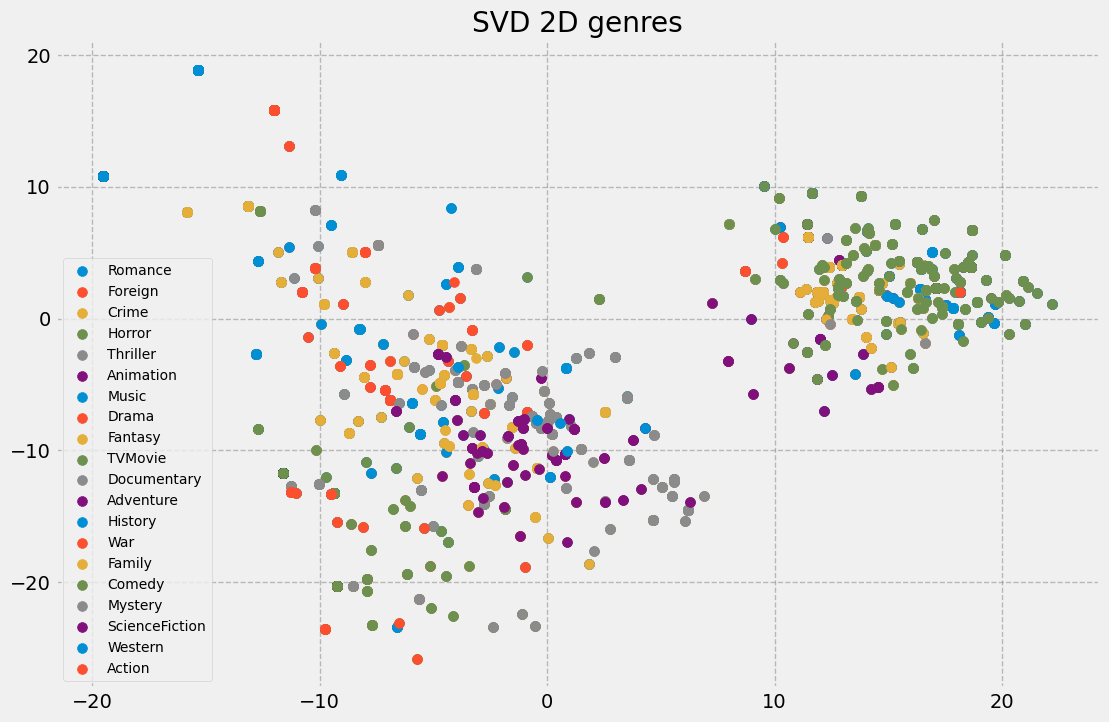

In [87]:
fig, ax = plt.subplots(figsize=(12, 8))
for genre in unique_genres['genre']:
    data_genre = data[data[genre] == 1]
    ax.scatter(data_genre[0], data_genre[1], label=genre, s=50)

ax.set_title('SVD 2D genres')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [88]:
tsvd3D = TruncatedSVD(n_components=3,random_state=42)
tsvd3D.fit(scaled_emb)
df_SVD=pd.DataFrame(tsvd3D.transform(scaled_emb))

In [89]:
from mpl_toolkits.mplot3d import Axes3D

In [90]:
data = pd.concat([pd.DataFrame(df_SVD), genre_matrix], axis=1)

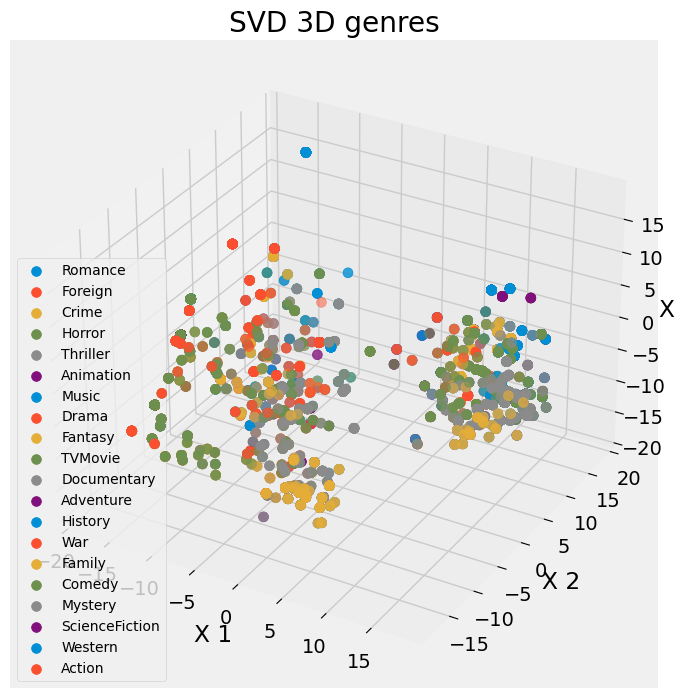

In [91]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 20  # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
for genre in unique_genres['genre']:
    data_genre = data[data[genre] == 1]  
    ax.scatter(data_genre[0], data_genre[1], data_genre[2], label=genre, s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title('SVD 3D genres')
ax.legend(loc='lower left', fontsize=10)
plt.show()

SVD on 3 dimensions looks more interresting

Maybe other Dimension reduce methods will show more 

PCA

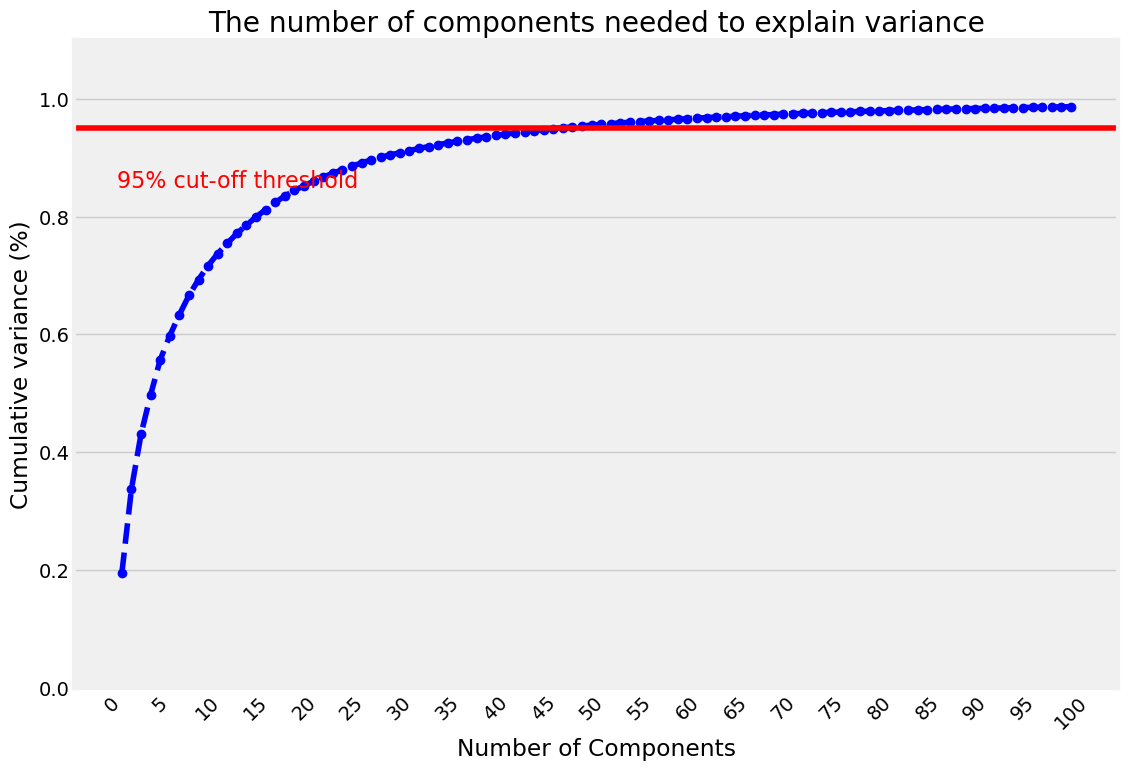

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Фитирование PCA с ограничением до 50 компонент
pca = PCA(n_components=100).fit(scaled_emb)

# Установка размера графика
plt.rcParams["figure.figsize"] = (12, 8)

# Создание подграфика
fig, ax = plt.subplots()

# Создание массива xi с длиной, равной количеству компонент в PCA
xi = np.arange(1, 101, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

# Ограничение оси y
plt.ylim(0.0, 1.1)
# Построение графика
plt.plot(xi, y, marker='o', linestyle='--', color='b')

# Подписи осей и заголовок
plt.xlabel('Number of Components')
# Наклон меток оси X и установка интервала в 5 значений
plt.xticks(np.arange(0, 101, step=5), rotation=45)
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

# Добавление горизонтальной линии и текста
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color='red', fontsize=16)

# Включение сетки по оси x
ax.grid(axis='x')

# Отображение графика
plt.show()


Low variance

Let's just try it

In [93]:
pca = PCA(n_components=2, random_state=42).fit(scaled_emb)
pca.fit(scaled_emb)
df_pca=pd.DataFrame(pca.transform(scaled_emb))

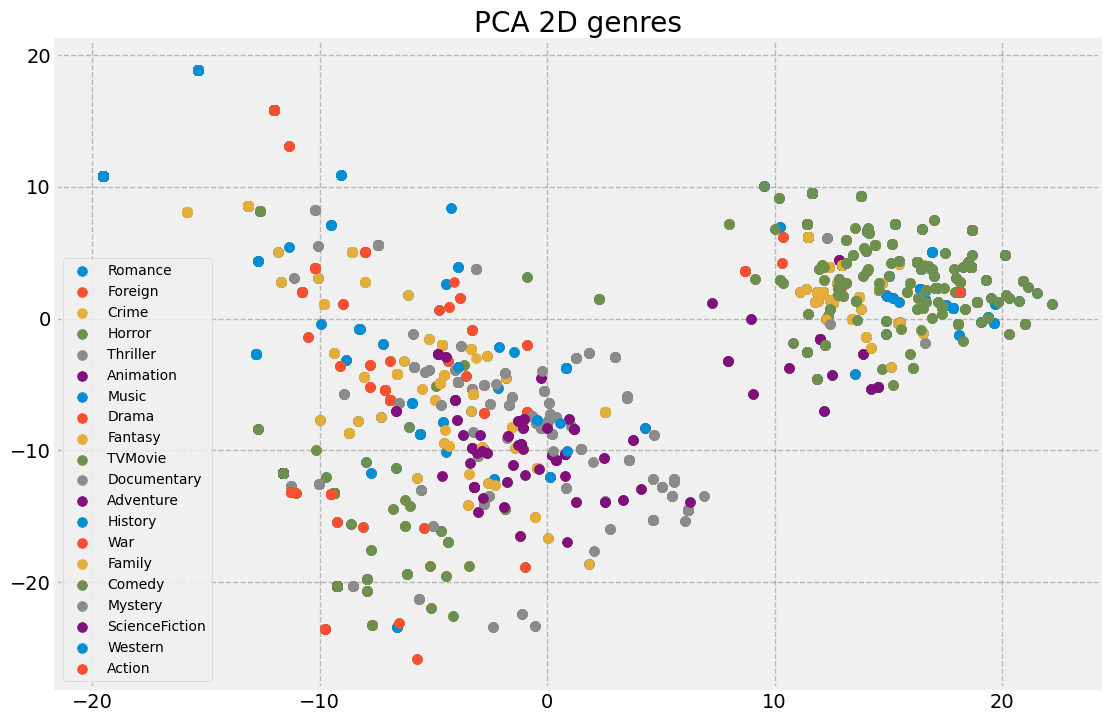

In [94]:
data = pd.concat([pd.DataFrame(df_pca), genre_matrix], axis=1)
fig, ax = plt.subplots(figsize=(12, 8))
for genre in unique_genres['genre']:
    data_genre = data[data[genre] == 1]
    ax.scatter(data_genre[0], data_genre[1], label=genre, s=50)

ax.set_title('PCA 2D genres')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

Looks the same like SVD

In [95]:
pca = PCA(n_components=3, random_state=42).fit(scaled_emb)
pca.fit(scaled_emb)
df_pca=pd.DataFrame(pca.transform(scaled_emb))

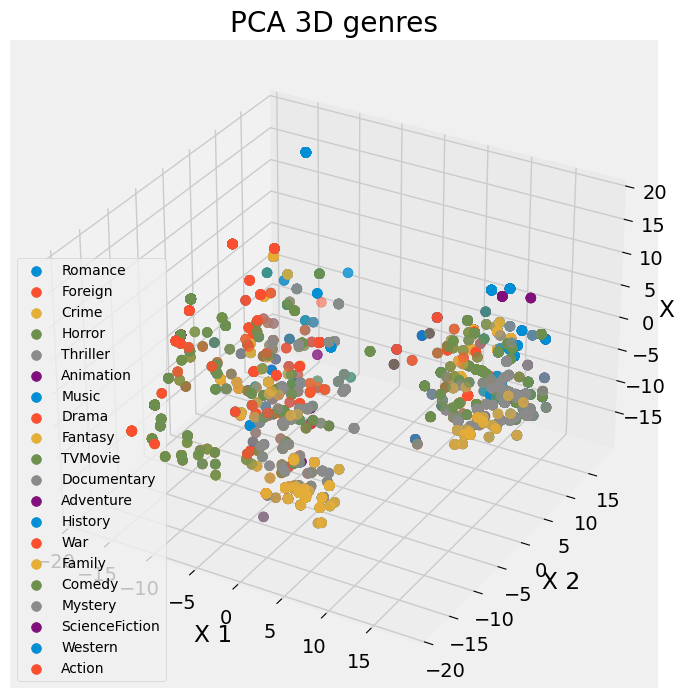

In [96]:
data = pd.concat([pd.DataFrame(df_pca), genre_matrix], axis=1)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 20  # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
for genre in unique_genres['genre']:
    data_genre = data[data[genre] == 1]  
    ax.scatter(data_genre[0], data_genre[1], data_genre[2], label=genre, s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title('PCA 3D genres')
ax.legend(loc='lower left', fontsize=10)
plt.show()

Also something like SVD, think we should get more clusters

UMAP time now

In [97]:
fit = umap.UMAP(random_state=42)
%time u2D = fit.fit_transform(scaled_emb)

CPU times: total: 19.6 s
Wall time: 19.2 s


In [98]:
df_U=pd.DataFrame(u2D)

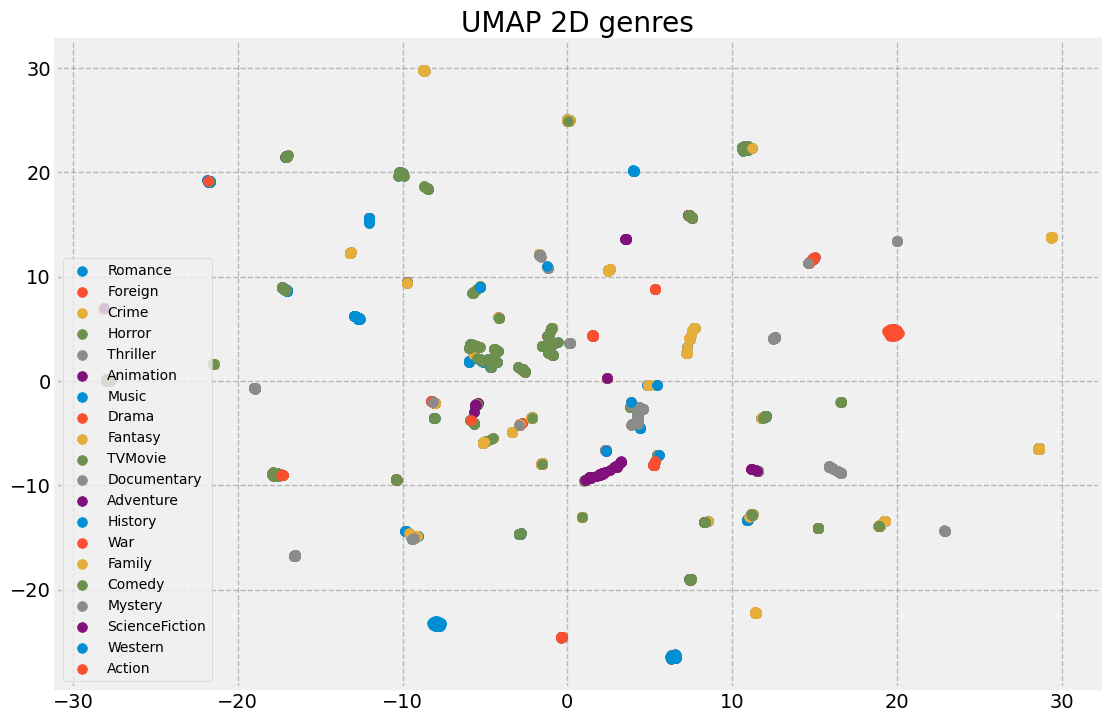

In [99]:
data = pd.concat([pd.DataFrame(df_U), genre_matrix], axis=1)
fig, ax = plt.subplots(figsize=(12, 8))
for genre in unique_genres['genre']:
    data_genre = data[data[genre] == 1]
    ax.scatter(data_genre[0], data_genre[1], label=genre, s=50)

ax.set_title('UMAP 2D genres')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

Something new, let's look on 3D

In [100]:
fit = umap.UMAP(n_components=3, random_state=42)
%time df_U=pd.DataFrame(fit.fit_transform(scaled_emb))

CPU times: total: 15.5 s
Wall time: 15.1 s


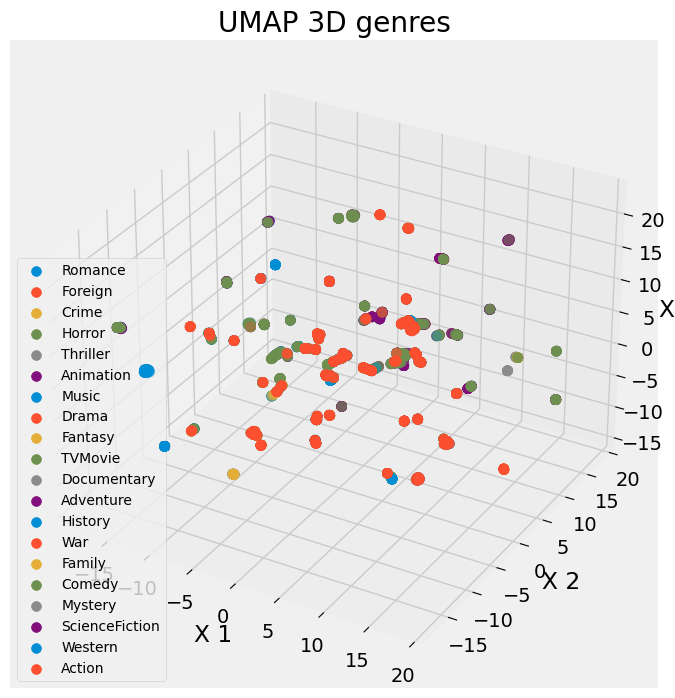

In [101]:
data = pd.concat([pd.DataFrame(df_U), genre_matrix], axis=1)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 20  # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
for genre in unique_genres['genre']:
    data_genre = data[data[genre] == 1]  
    ax.scatter(data_genre[0], data_genre[1], data_genre[2], label=genre, s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title('UMAP 3D genres')
ax.legend(loc='lower left', fontsize=10)
plt.show()

Let's take SVD 3D, it seems more informative, but PCA is the same, so take what you want

In [102]:
tsvd3D = TruncatedSVD(n_components=3,random_state=42)
tsvd3D.fit(scaled_emb)
genres_3D=pd.DataFrame(tsvd3D.transform(scaled_emb))

In [103]:
import skops.io as sio

In [104]:
# Сохранение модели с помощью skops
sio.dump(tsvd3D, 'tsvd3D_genres_model.skops') 

# # Загрузка модели
# loaded_tsvd3D = sio.load('tsvd3D_model.skops') 

In [105]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import hdbscan

In [106]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, adjusted_rand_score

In [107]:
def get_metrics(algo_name, X, y_pred):
    # calinski= calinski_harabasz_score(X, y_pred)
    dav_boul= davies_bouldin_score (X, y_pred)
    sil = silhouette_score(X, y_pred)
    # adj= adjusted_rand_score(y_true, y_pred)
    return f"{algo_name}\nSilhouette {sil:.2f}\nDavies-Bouldin {dav_boul:.2f}"#\nCalinsik-Harabasz {calinski:.2f}

In [108]:
genres_3D.describe()

0             1             2
count  2.537000e+03  2.537000e+03  2.537000e+03
mean  -2.044930e-07  1.804350e-08 -9.623201e-08
std    1.224274e+01  1.046686e+01  8.458281e+00
min   -1.951495e+01 -2.579513e+01 -2.145658e+01
25%   -1.105590e+01 -7.902133e+00 -5.706436e+00
50%   -3.305781e+00  2.007536e+00  1.872977e+00
75%    1.295597e+01  6.606846e+00  5.559298e+00
max    2.221967e+01  1.887906e+01  1.411495e+01

We have 20 genres

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


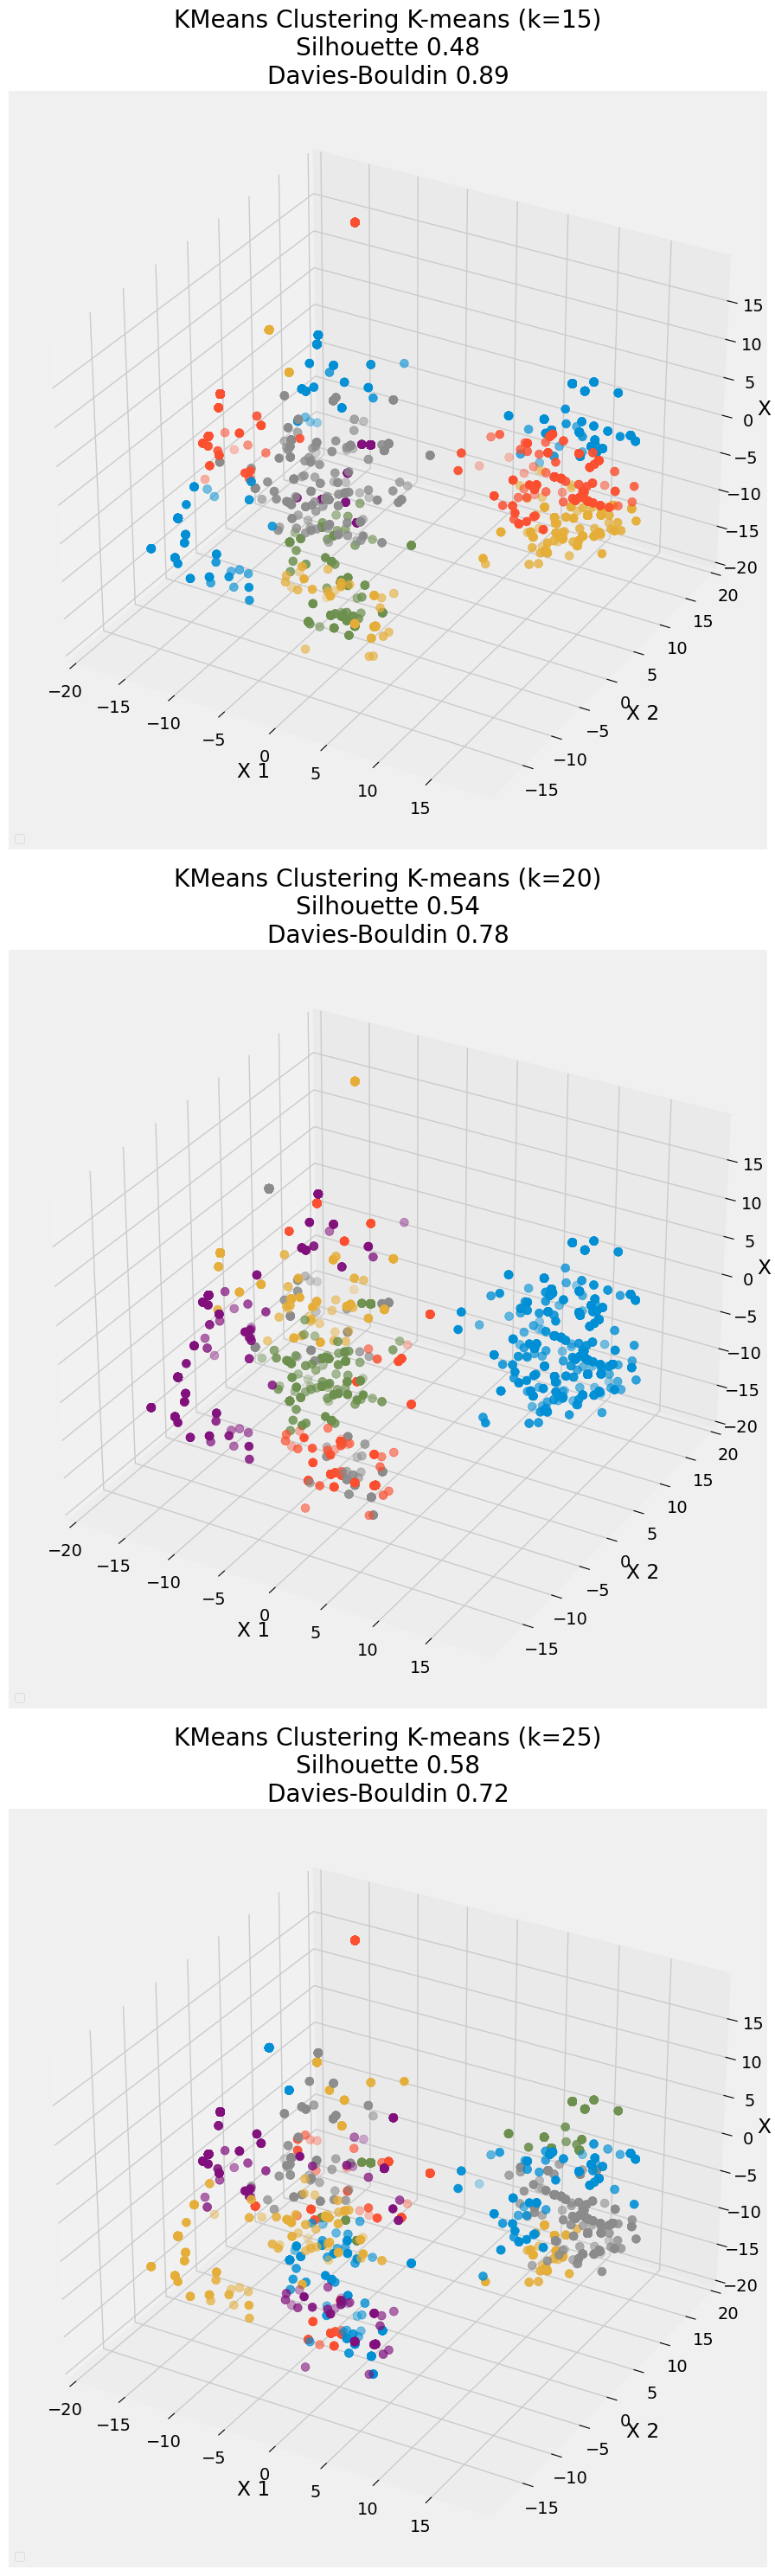

In [109]:
k_values = [15, 20, 25]


fig = plt.figure(figsize=(12, 30))  

# Итерация по значениям k
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(genres_3D)
    centers = kmeans.cluster_centers_

    ax = fig.add_subplot(len(k_values), 1, i + 1, projection='3d')  

    x_center = genres_3D[0].mean()
    y_center = genres_3D[1].mean()
    z_center = genres_3D[2].mean()

    radius = 20 

    ax.set_xlim(x_center - radius, x_center + radius)
    ax.set_ylim(y_center - radius, y_center + radius)
    ax.set_zlim(z_center - radius, z_center + radius)

    for cluster_id in range(k):
        cluster_data = genres_3D[clusters == cluster_id]
        ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=None,s=50)

    ax.set_xlabel('X 1')
    ax.set_ylabel('X 2')
    ax.set_zlabel('X 3')
    ax.set_title(f'KMeans Clustering {get_metrics(f"K-means (k={k})", genres_3D, clusters )}')
    ax.legend(loc='lower left', fontsize=10)

plt.tight_layout()  
plt.show()

In [110]:
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(genres_3D)
centers = kmeans.cluster_centers_

ax = fig.add_subplot(len(k_values), 1, i + 1, projection='3d')  

x_center = genres_3D[0].mean()
y_center = genres_3D[1].mean()
z_center = genres_3D[2].mean()

radius = 20 

ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

for cluster_id in range(k):
    cluster_data = genres_3D[clusters == cluster_id]
    ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=None,s=50)

ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title(f'KMeans Clustering {get_metrics(f"K-means (k={k})", genres_3D, clusters )}')
ax.legend(loc='lower left', fontsize=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [111]:
k=20
kmeans = KMeans(n_clusters=k, random_state=42,)
clusters = kmeans.fit_predict(genres_3D)
clusters_df=pd.DataFrame(clusters,columns=['cluster'])
clusters_df

cluster
0           3
1          16
2          19
3          18
4           4
...       ...
2532        9
2533        6
2534       19
2535        8
2536       16

[2537 rows x 1 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


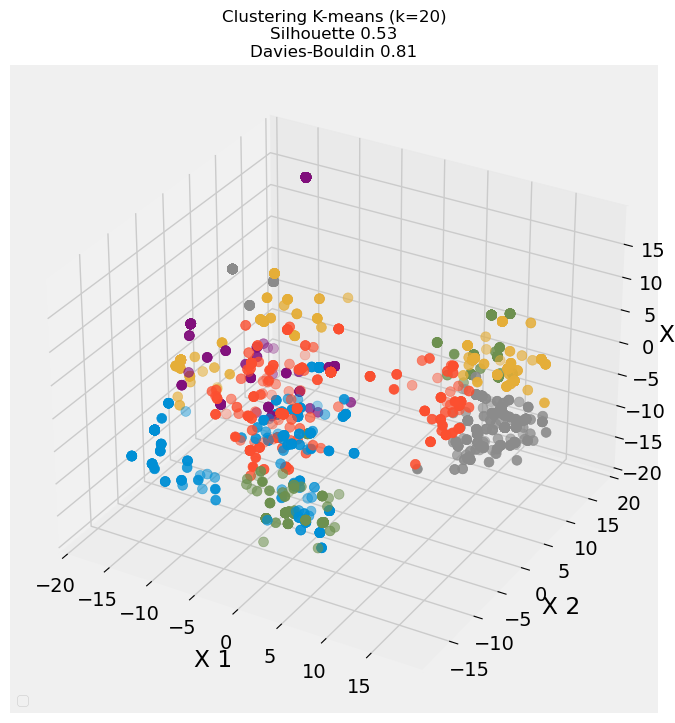

In [112]:
data = pd.concat([ genres_3D,clusters_df, genre_matrix], axis=1)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 20  # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
for cluster_id in range(k):
    cluster_data = genres_3D[clusters == cluster_id]
    ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=None,s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title(f'Clustering {get_metrics(f"K-means (k={k})", genres_3D, clusters)}', size=12)
plt.rcParams['figure.facecolor'] = 'white'
ax.legend(loc='lower left', fontsize=10)
plt.show()

In [113]:
genres_3D

0          1          2
0     -4.619838  -2.003358 -16.860966
1     17.111319   2.298493  -2.120147
2     -6.898155  -6.148652   4.051120
3      2.983787  -2.911626  -8.125521
4    -13.161213   8.548437   4.870073
...         ...        ...        ...
2532  11.454601   6.207516   4.134680
2533 -12.003901  15.815363 -13.065905
2534  -5.373692  -4.064890   0.037793
2535  18.141804   2.007536   5.559298
2536  12.955958   4.057927   0.080088

[2537 rows x 3 columns]

In [114]:
model = AgglomerativeClustering(distance_threshold=None, n_clusters=20)
model=model.fit(genres_3D)
model

AgglomerativeClustering(n_clusters=20)

In [115]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

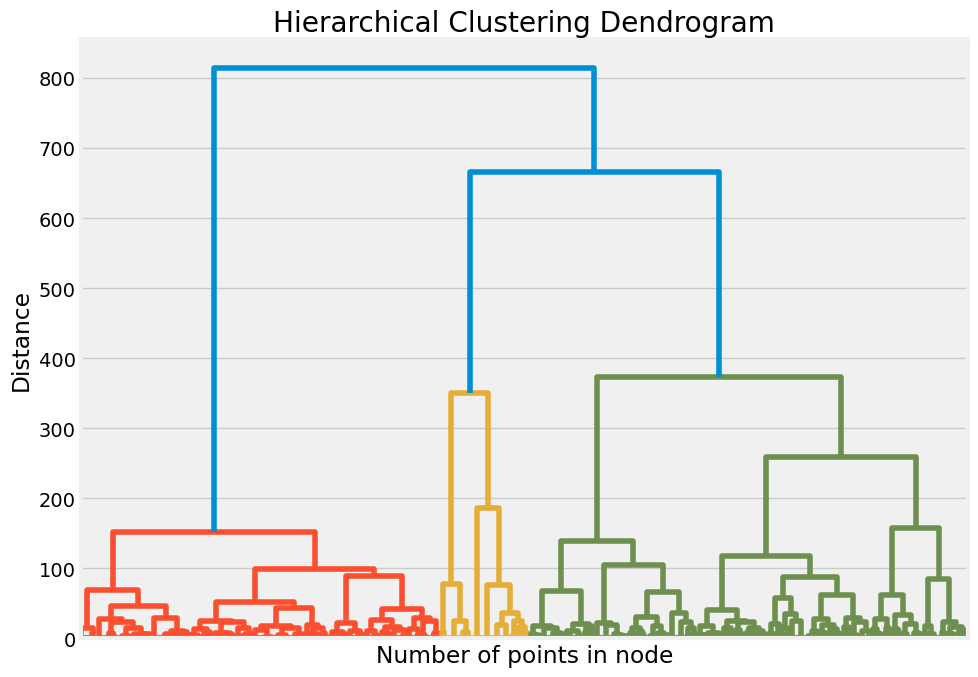

In [116]:
linkage_matrix = linkage(genres_3D, method='ward')

# Dendogram
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode="level",
    p=20,
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=6,
    show_contracted=True,
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node")
plt.ylabel("Distance")
# Hide Xticks
plt.xticks([])
plt.tight_layout()
plt.show()

In [117]:
aggcls= AgglomerativeClustering(n_clusters=k, metric='l2', linkage='average').fit(genres_3D)
clusters = aggcls.fit_predict(genres_3D)
clusters_df=pd.DataFrame(clusters,columns=['cluster'])
clusters_df

cluster
0          14
1           2
2           1
3           4
4          13
...       ...
2532        2
2533       16
2534        1
2535        2
2536        2

[2537 rows x 1 columns]

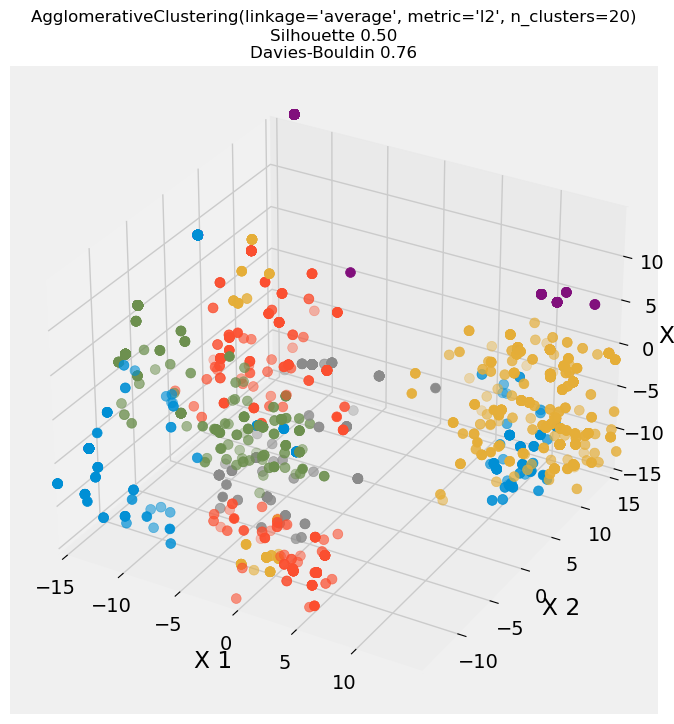

In [118]:
data = pd.concat([ genres_3D,clusters_df, genre_matrix], axis=1)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 15  # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
for cluster_id in range(k):
    cluster_data = genres_3D[clusters == cluster_id]
    ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=None,s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title(f'{get_metrics(aggcls, genres_3D, clusters)}', size=12)
plt.rcParams['figure.facecolor'] = 'white'
# ax.legend(loc='lower left', fontsize=10)
plt.show()

In [119]:
hdb = hdbscan.HDBSCAN(min_cluster_size=5,min_samples=5,cluster_selection_epsilon=0.3, cluster_selection_method='leaf',  )
clusters=hdb.fit_predict(genres_3D)
clusters_df=pd.DataFrame(clusters,columns=['cluster'])
clusters_df.nunique()

cluster    113
dtype: int64

In [120]:
clusters_df.shape

(2537, 1)

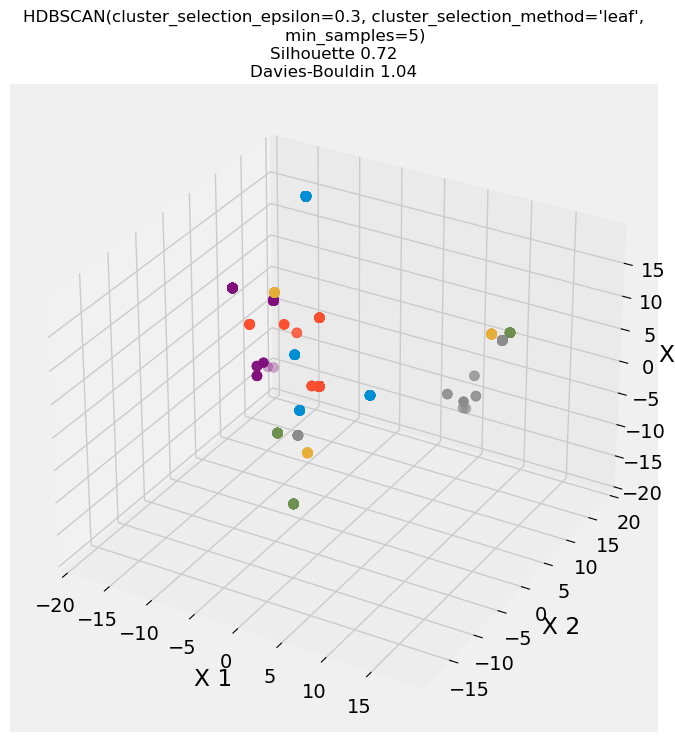

In [121]:
data = pd.concat([ genres_3D,clusters_df, genre_matrix], axis=1)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 20 # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
for cluster_id in range(k):
    cluster_data = genres_3D[clusters == cluster_id]
    ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=None,s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title(f'{get_metrics(hdb, genres_3D, clusters)}', size=12)
plt.rcParams['figure.facecolor'] = 'white'
# ax.legend(loc='lower left', fontsize=10)
plt.show()

No comments

Let's choose final model K-means 

In [122]:
k=20
kmeans = KMeans(n_clusters=k, random_state=1)
clusters = kmeans.fit_predict(genres_3D)
clusters_df=pd.DataFrame(clusters,columns=['cluster'])
clusters_df

cluster
0           9
1          17
2           7
3          18
4           6
...       ...
2532       19
2533        3
2534       12
2535        8
2536       15

[2537 rows x 1 columns]

In [123]:
# Сохранение модели с помощью skops
sio.dump(kmeans, 'kmeans_genres_model.skops') 

# # Загрузка модели
# loaded_tsvd3D = sio.load('tsvd3D_model.skops') 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


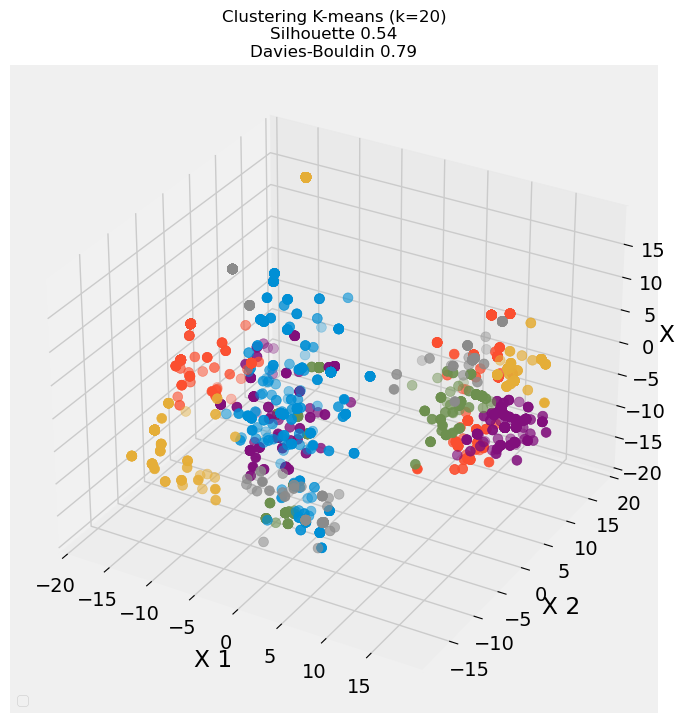

In [124]:
data = pd.concat([ genres_3D,clusters_df, genre_matrix], axis=1)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 20  # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
for cluster_id in range(k):
    cluster_data = genres_3D[clusters == cluster_id]
    ax.scatter(cluster_data[0], cluster_data[1], cluster_data[2], label=None,s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title(f'Clustering {get_metrics(f"K-means (k={k})", genres_3D, clusters)}', size=12)
plt.rcParams['figure.facecolor'] = 'white'
ax.legend(loc='lower left', fontsize=10)
plt.show()

In [125]:
data = pd.concat([ genres_3D,clusters_df], axis=1)
genres=data
genres.head()

0         1          2  cluster
0  -4.619838 -2.003358 -16.860966        9
1  17.111319  2.298493  -2.120147       17
2  -6.898155 -6.148652   4.051120        7
3   2.983787 -2.911626  -8.125521       18
4 -13.161213  8.548437   4.870073        6

In [126]:
genres.columns = ['genre_x1', 'genre_x2', 'genre_x3', 'genre_cluster']

In [127]:
genres.head()

genre_x1  genre_x2   genre_x3  genre_cluster
0  -4.619838 -2.003358 -16.860966              9
1  17.111319  2.298493  -2.120147             17
2  -6.898155 -6.148652   4.051120              7
3   2.983787 -2.911626  -8.125521             18
4 -13.161213  8.548437   4.870073              6

Done with Genres, let't take a look on Cast

In [128]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = BertModel.from_pretrained('bert-base-cased').to(device)

In [129]:
tokenized = [tokenizer.encode(x, add_special_tokens=256) for x in tqdm(movies['cast'])]
padded = np.array([i + [0]*(256-len(i)) for i in tokenized])
attention_mask = np.where(padded != 0, 1, 0)

  0%|          | 0/2537 [00:00<?, ?it/s]

100%|██████████| 2537/2537 [00:00<00:00, 23711.15it/s]


In [130]:
input_ids = torch.tensor(padded).to(device)
attention_mask = torch.tensor(attention_mask).to(device)
batch_size = 2
features_list = []
for i in tqdm(range(0, len(input_ids), batch_size)):
    batch_input_ids = input_ids[i:i+batch_size]
    batch_attention_mask = attention_mask[i:i+batch_size]
    with torch.no_grad():
        last_hidden_states = bert_model(batch_input_ids, attention_mask=batch_attention_mask)
    features = last_hidden_states[0][:,0,:].cpu().numpy()
    features_list.append(features)

  0%|          | 0/1269 [00:00<?, ?it/s]

100%|██████████| 1269/1269 [01:08<00:00, 18.60it/s]


In [131]:
torch.save(bert_model.state_dict(), 'bert_model_finetuned_cast.pth')

In [132]:
all_features = np.concatenate(features_list, axis=0)

In [133]:
cast_bert=pd.DataFrame(all_features)

In [134]:
cast_bert.to_csv('cast_bert.csv', index=False)

In [135]:
%%time
scaler = StandardScaler()
scaler.fit(cast_bert)

scaled_emb = scaler.transform(cast_bert)

CPU times: total: 78.1 ms
Wall time: 78 ms


In [136]:
scaled_emb.shape

(2537, 768)

In [137]:
tsvd2D = TruncatedSVD(n_components=2,random_state=42)
tsvd2D.fit(scaled_emb)
df_SVD=pd.DataFrame(tsvd2D.transform(scaled_emb))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


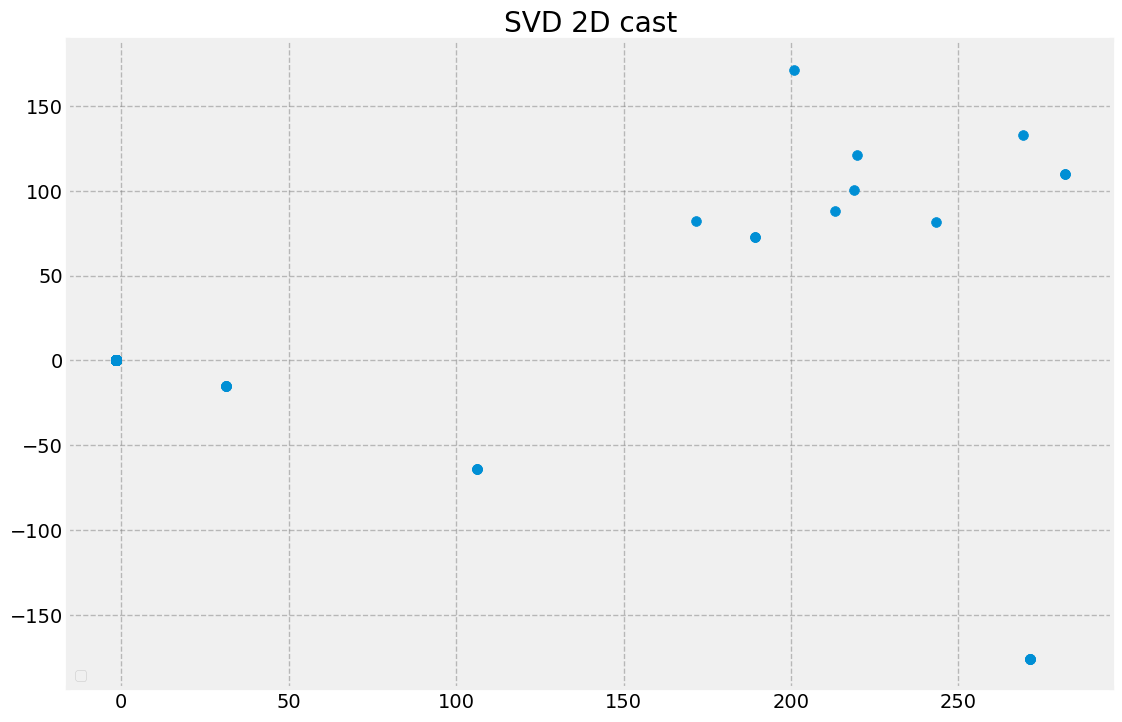

In [138]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_SVD[0], df_SVD[1], s=50)

ax.set_title('SVD 2D cast')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [139]:
tsvd3D = TruncatedSVD(n_components=3,random_state=42)
tsvd3D.fit(scaled_emb)
data=pd.DataFrame(tsvd3D.transform(scaled_emb))

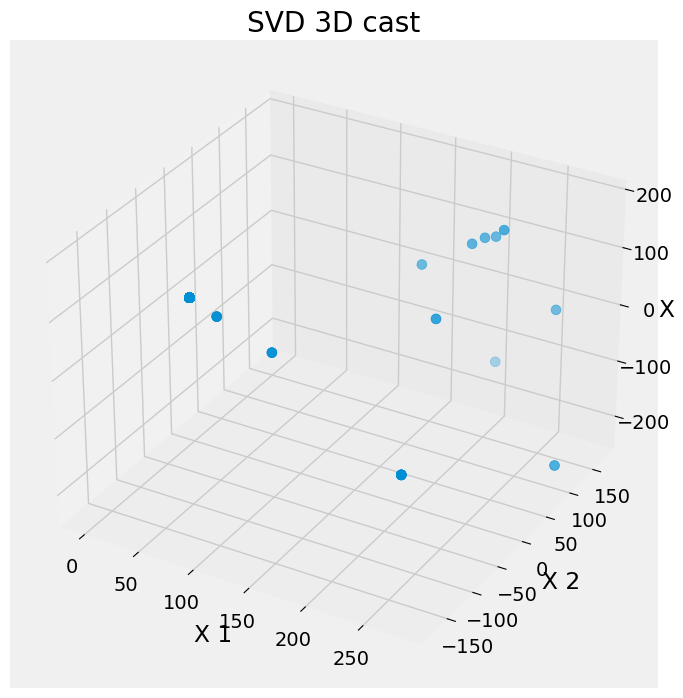

In [140]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# # Определяем центр 3D плоскости
# x_center = data[0].mean()
# y_center = data[1].mean()
# z_center = data[2].mean()

# # Устанавливаем радиус вокруг центральной точки
# radius =1# Это значение можно настроить

# # Устанавливаем границы для каждой оси
# ax.set_xlim(x_center - radius, x_center + radius)
# ax.set_ylim(y_center - radius, y_center + radius)
# ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
ax.scatter(data[0], data[1], data[2], s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title('SVD 3D cast')
plt.show()

So for cast it's not so easy
SKIP PCA

In [141]:
fit = umap.UMAP(random_state=42)
%time u2D = fit.fit_transform(scaled_emb)
df_U=pd.DataFrame(u2D)

CPU times: total: 19.7 s
Wall time: 19.9 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


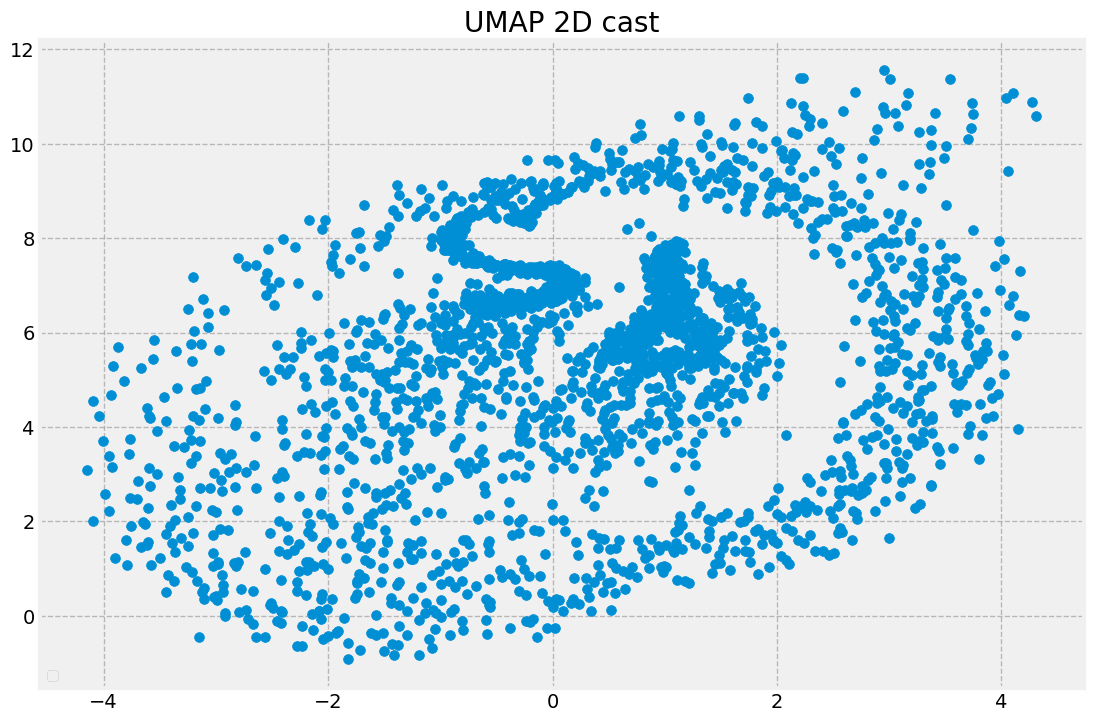

In [142]:
data = pd.concat([pd.DataFrame(df_U), genre_matrix], axis=1)
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data[0], data[1],  s=50)
ax.set_title('UMAP 2D cast')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

Looks really interresting

In [143]:
fit = umap.UMAP(n_components=3, random_state=42)
%time df_U=pd.DataFrame(fit.fit_transform(scaled_emb))

CPU times: total: 20 s
Wall time: 19.8 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


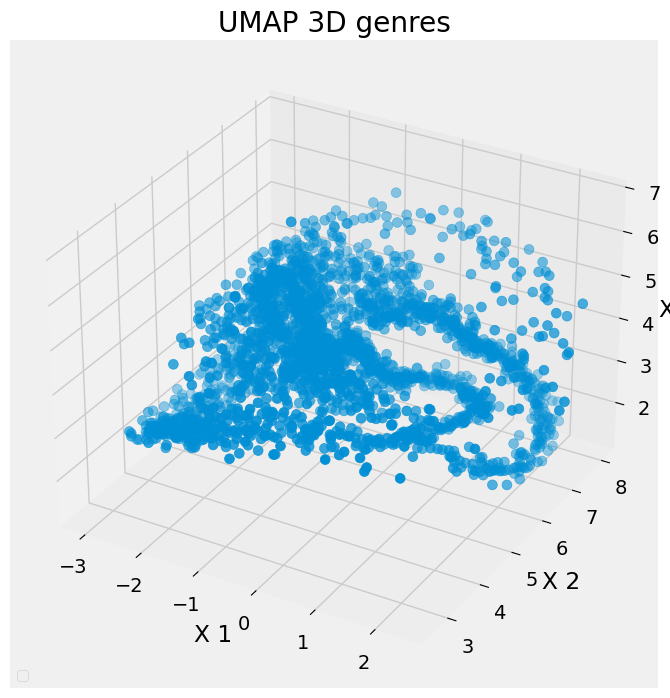

In [144]:
data = df_U
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 3 # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
ax.scatter(data[0], data[1], data[2], s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title('UMAP 3D genres')
ax.legend(loc='lower left', fontsize=10)
plt.show()

Favourite now is UMAP 2D

In [145]:
Umap = umap.UMAP(random_state=42)
%time u2D = Umap.fit_transform(scaled_emb)
df_U=pd.DataFrame(u2D)

CPU times: total: 20.2 s
Wall time: 20.1 s


In [146]:
df_U.shape

(2537, 2)

In [147]:
Umap

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [148]:
import joblib

joblib.dump(Umap, 'Umap2D_cast_model.joblib')

['Umap2D_cast_model.joblib']

We have 4000+ cast dimension, so it's problem

In [263]:
kmeans = KMeans(random_state=42, n_clusters=25)
clusters = kmeans.fit_predict(df_U)

In [264]:
data = df_U

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


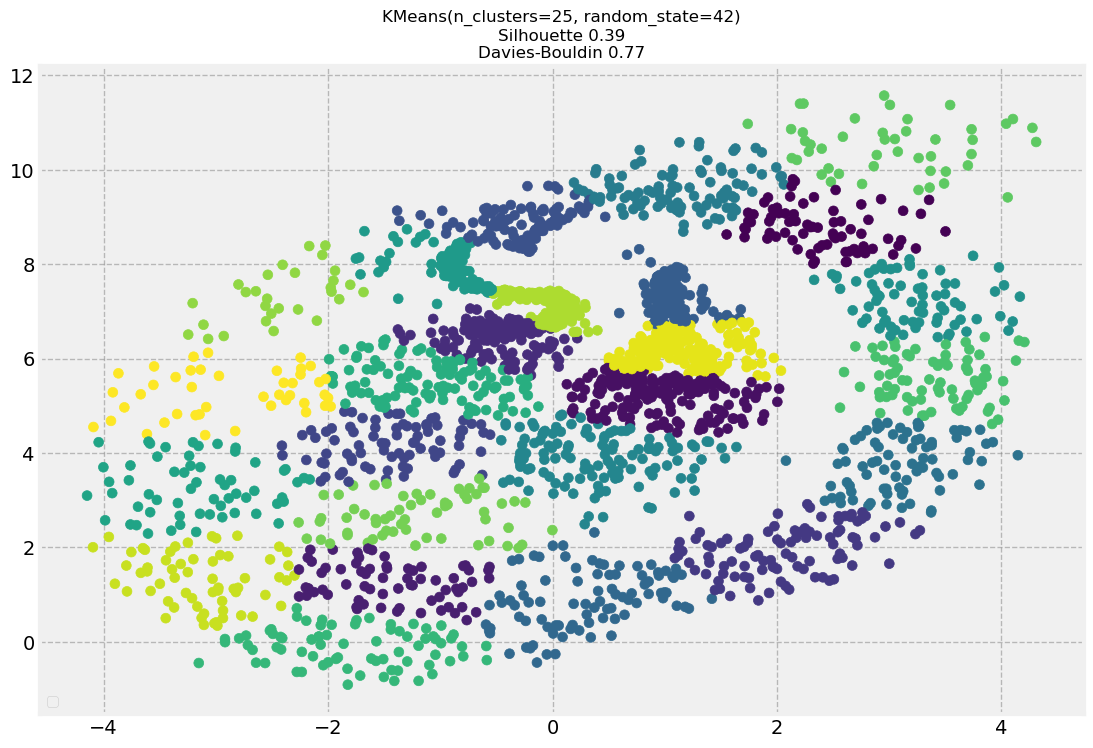

In [265]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data[0], data[1],  c=clusters,s=50)
ax.set_title(f'{get_metrics(kmeans, data, clusters)}', size=12)
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [201]:
hdb = hdbscan.HDBSCAN(min_cluster_size=45,min_samples=1,alpha=1.0 )
clusters=hdb.fit_predict(df_U)
clusters_df=pd.DataFrame(clusters,columns=['cluster'])
clusters_df.nunique()

cluster    12
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


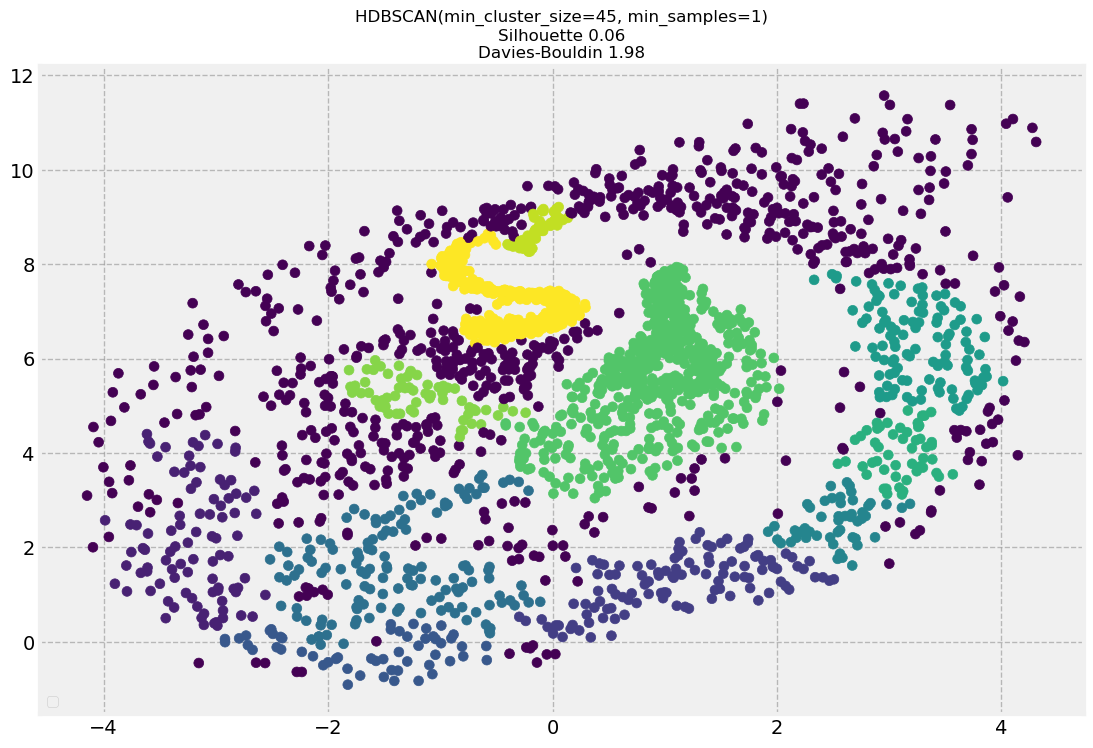

In [202]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data[0], data[1],  c=clusters,s=50)
ax.set_title(f'{get_metrics(hdb, data, clusters)}', size=12)
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

K_means seems more better

In [266]:
kmeans = KMeans(random_state=42, n_clusters=25)
clusters = kmeans.fit_predict(df_U)

In [267]:
# Сохранение модели с помощью skops
sio.dump(kmeans, 'kmeans_cast_model.skops') 

# # Загрузка модели
# loaded_tsvd3D = sio.load('tsvd3D_model.skops') 

In [277]:
clusters_df=pd.DataFrame(clusters)
clusters_df

0
0     16
1     11
2     16
3      1
4     14
...   ..
2532   7
2533   7
2534   7
2535   7
2536   7

[2537 rows x 1 columns]

In [280]:
data = pd.concat([df_U,clusters_df], axis=1)
cast=data
cast.head()

0         1   0
0 -1.070758 -0.684697  16
1  1.537203  3.888912  11
2 -1.968244  0.360821  16
3  1.869653  4.686978   1
4 -3.203744  4.228349  14

In [281]:
cast.columns=['cast_x1','cast_x2', 'cast_cluster']
cast.head()

cast_x1   cast_x2  cast_cluster
0 -1.070758 -0.684697            16
1  1.537203  3.888912            11
2 -1.968244  0.360821            16
3  1.869653  4.686978             1
4 -3.203744  4.228349            14

In [282]:
movies

movieId                    title      id  \
0           1         Toy Story (1995)     862   
1          10         GoldenEye (1995)     710   
2          14             Nixon (1995)   10858   
3          15  Cutthroat Island (1995)    1408   
4          16            Casino (1995)     524   
...       ...                      ...     ...   
2532   161127   The Infiltrator (2016)  325789   
2533   161580          Bad Moms (2016)  376659   
2534   173197        The Square (2017)  159037   
2535   180263       The Shining (1997)     694   
2536   186587           Rampage (2018)   38780   

                                genres  \
0          [Animation, Comedy, Family]   
1        [Action, Adventure, Thriller]   
2                     [Drama, History]   
3                  [Action, Adventure]   
4                       [Crime, Drama]   
...                                ...   
2532          [Crime, Drama, Thriller]   
2533                          [Comedy]   
2534     [Documentary, Drama, History]   
2535                [Horror, Thriller]   
2536  [Action, Crime, Drama, Thriller]   

                                                   cast  vote_average  \
0           [DonRickles, JimVarney, TimAllen, TomHanks]           7.7   
1     [FamkeJanssen, IzabellaScorupco, PierceBrosnan...           6.6   
2     [AnthonyHopkins, EdHarris, JoanAllen, PowersBo...           7.1   
3     [FrankLangella, GeenaDavis, MatthewModine, Mau...           5.7   
4     [JamesWoods, JoePesci, RobertDeNiro, SharonStone]           7.8   
...                                                 ...           ...   
2532  [BryanCranston, DanielMays, DianeKruger, JohnL...           6.6   
2533  [ChristinaApplegate, KathrynHahn, KristenBell,...           6.3   
2534  [DinaAbdullah, DinaAmer, KhalidAbdalla, MagdyA...           7.8   
2535  [DannyLloyd, JackNicholson, ScatmanCrothers, S...           8.1   
2536  [BrendanFletcher, LyndaBoyd, MichaelParé, Shau...           6.0   

             director                                           keywords  \
0       John Lasseter  [boy, boynextdoor, friends, friendship, jealou...   
1     Martin Campbell  [computervirus, cossack, cuba, ejectionseat, e...   
2        Oliver Stone  [biography, government, historicalfigure, pres...   
3        Renny Harlin  [exoticisland, map, pirate, scalp, ship, treas...   
4     Martin Scorsese  [1970s, drugabuse, illegalprostitution, overdo...   
...               ...                                                ...   
2532      Brad Furman            [biography, drug, druglord, undercover]   
2533        Jon Lucas  [alcohol, bar, bathroomhumor, divorce, family,...   
2534   Jehane Noujaim                                    [womandirector]   
2535  Stanley Kubrick  [alcoholic, ax, bartender, caretaker, colorado...   
2536         Uwe Boll                  [killingspree, massacre, rampage]   

            title_key  
0            toystory  
1           goldeneye  
2               nixon  
3     cutthroatisland  
4              casino  
...               ...  
2532   theinfiltrator  
2533          badmoms  
2534        thesquare  
2535       theshining  
2536          rampage  

[2537 rows x 9 columns]

keywords time

In [284]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = BertModel.from_pretrained('bert-base-cased').to(device)

In [285]:
tokenized = [tokenizer.encode(x, add_special_tokens=256) for x in tqdm(movies['keywords'])]
padded = np.array([i + [0]*(256-len(i)) for i in tokenized])
attention_mask = np.where(padded != 0, 1, 0)

100%|██████████| 2537/2537 [00:00<00:00, 15856.62it/s]


In [286]:
input_ids = torch.tensor(padded).to(device)
attention_mask = torch.tensor(attention_mask).to(device)
batch_size = 2
features_list = []
for i in tqdm(range(0, len(input_ids), batch_size)):
    batch_input_ids = input_ids[i:i+batch_size]
    batch_attention_mask = attention_mask[i:i+batch_size]
    with torch.no_grad():
        last_hidden_states = bert_model(batch_input_ids, attention_mask=batch_attention_mask)
    features = last_hidden_states[0][:,0,:].cpu().numpy()
    features_list.append(features)

100%|██████████| 1269/1269 [01:08<00:00, 18.52it/s]


In [287]:
torch.save(bert_model.state_dict(), 'bert_model_finetuned_keywords.pth')

In [288]:
all_features = np.concatenate(features_list, axis=0)

In [289]:
keywords_bert=pd.DataFrame(all_features)

In [290]:
keywords_bert.to_csv('keywords_bert.csv', index=False)

In [291]:
%%time
scaler = StandardScaler()
scaler.fit(keywords_bert)

scaled_emb = scaler.transform(keywords_bert)

CPU times: total: 78.1 ms
Wall time: 76 ms


In [292]:
tsvd2D = TruncatedSVD(n_components=2,random_state=42)
tsvd2D.fit(scaled_emb)
df_SVD=pd.DataFrame(tsvd2D.transform(scaled_emb))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


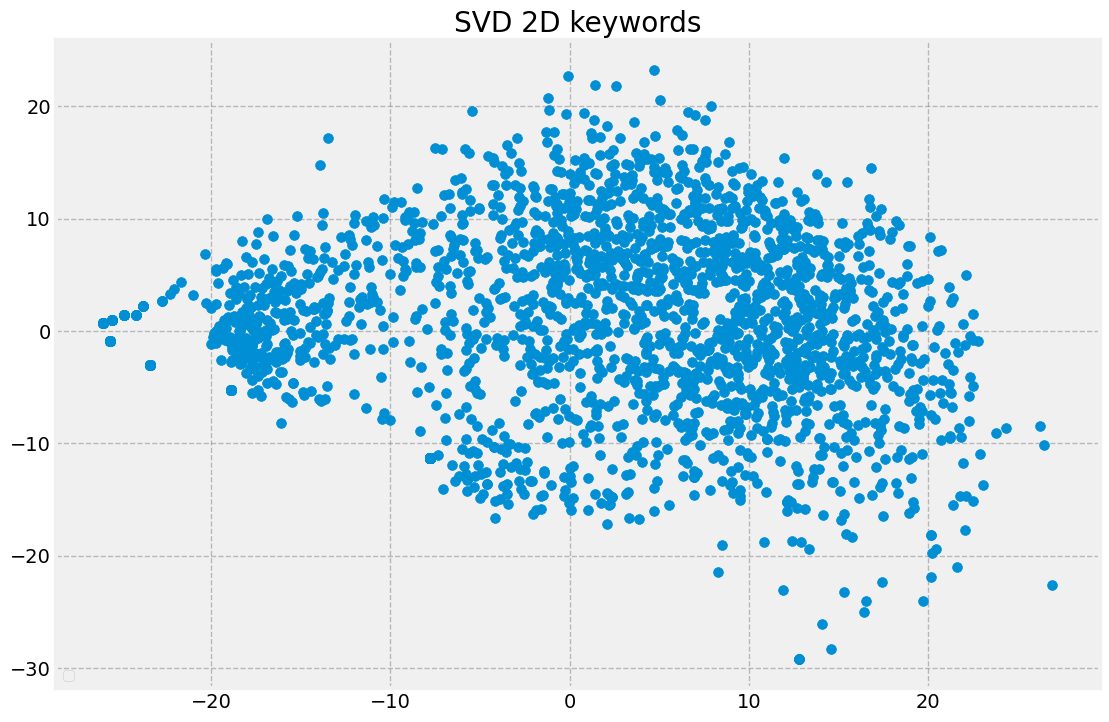

In [293]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_SVD[0], df_SVD[1], s=50)

ax.set_title('SVD 2D keywords')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [302]:
tsvd3D = TruncatedSVD(n_components=3,random_state=42)
tsvd3D.fit(scaled_emb)
data=pd.DataFrame(tsvd3D.transform(scaled_emb))

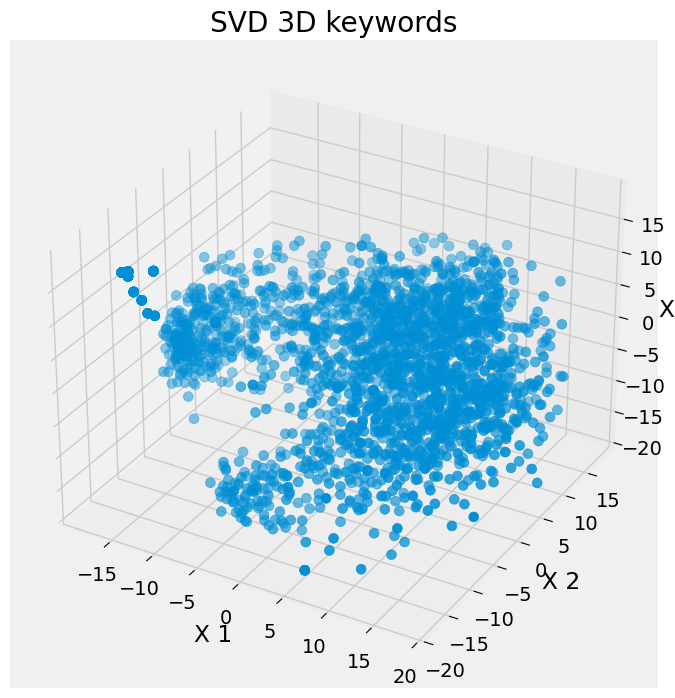

In [303]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius =20# Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
ax.scatter(data[0], data[1], data[2], s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title('SVD 3D keywords')
plt.show()

In [307]:
fit = umap.UMAP(random_state=42)
%time u2D = fit.fit_transform(scaled_emb)
df_U=pd.DataFrame(u2D)

CPU times: total: 10.9 s
Wall time: 10.6 s


In [308]:
df_U.shape

(2537, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


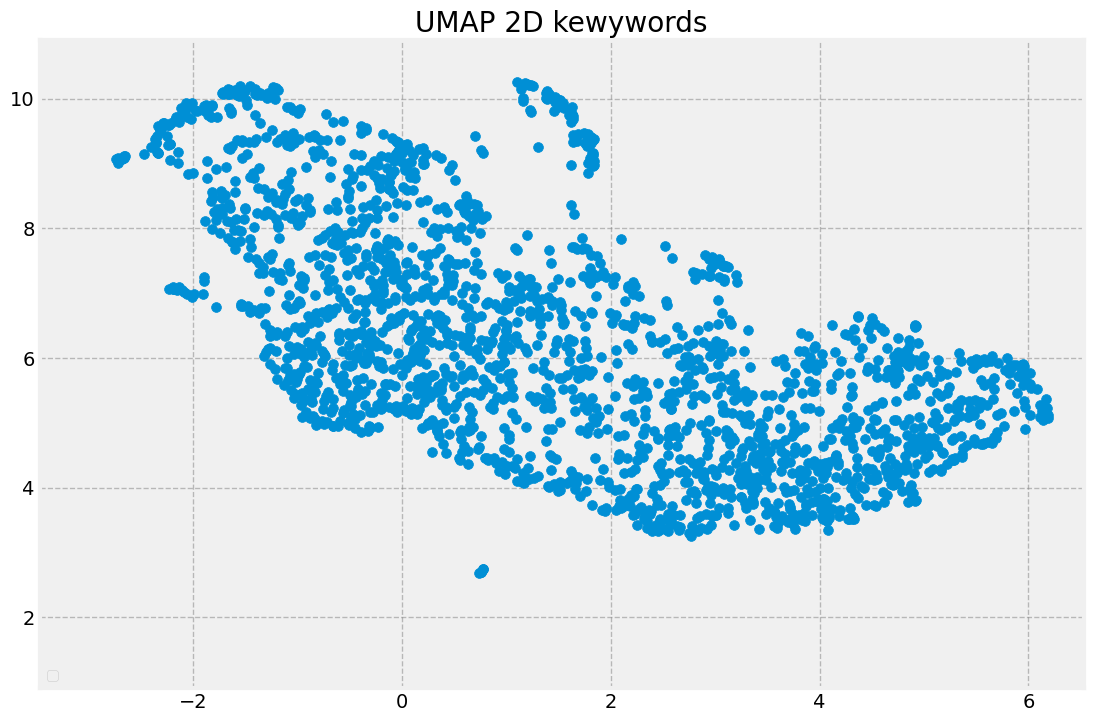

In [310]:
data = df_U
fig, ax = plt.subplots(figsize=(12, 8))
x_center = data[0].median()
y_center = data[1].median()
# Установите радиус вокруг центральной точки
radius = 5 # Это значение можно настроить
# Установите границы для каждой оси
plt.xlim(x_center - radius, x_center + radius)
plt.ylim(y_center - radius, y_center + radius)
ax.scatter(data[0], data[1],  s=50)
ax.set_title('UMAP 2D keywords')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [312]:
fit = umap.UMAP(n_components=3, random_state=42)
%time df_U=pd.DataFrame(fit.fit_transform(scaled_emb))

CPU times: total: 10.9 s
Wall time: 10.5 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


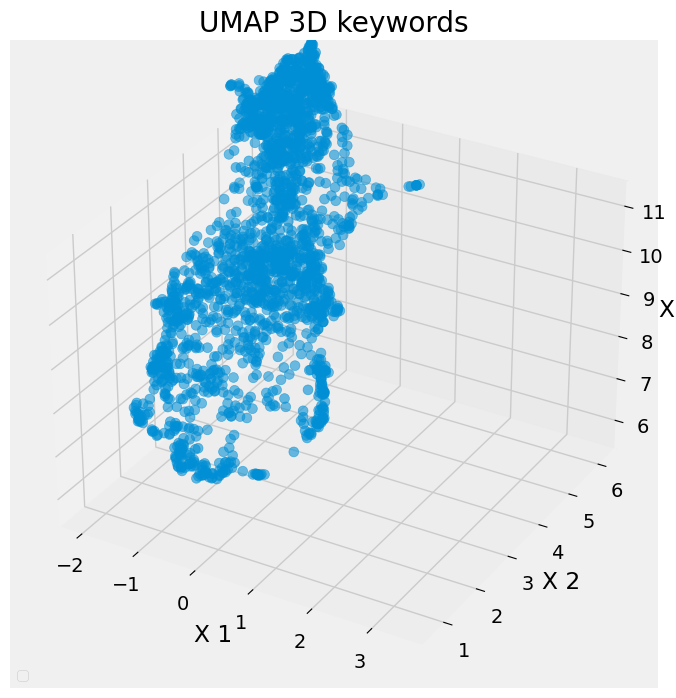

In [314]:
data = df_U
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 3 # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
ax.scatter(data[0], data[1], data[2], s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title('UMAP 3D keywords')
ax.legend(loc='lower left', fontsize=10)
plt.show()

UMAP has outliers which seems not so good

In [316]:
pca = PCA(n_components=2, random_state=42).fit(scaled_emb)
pca.fit(scaled_emb)
df_pca=pd.DataFrame(pca.transform(scaled_emb))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


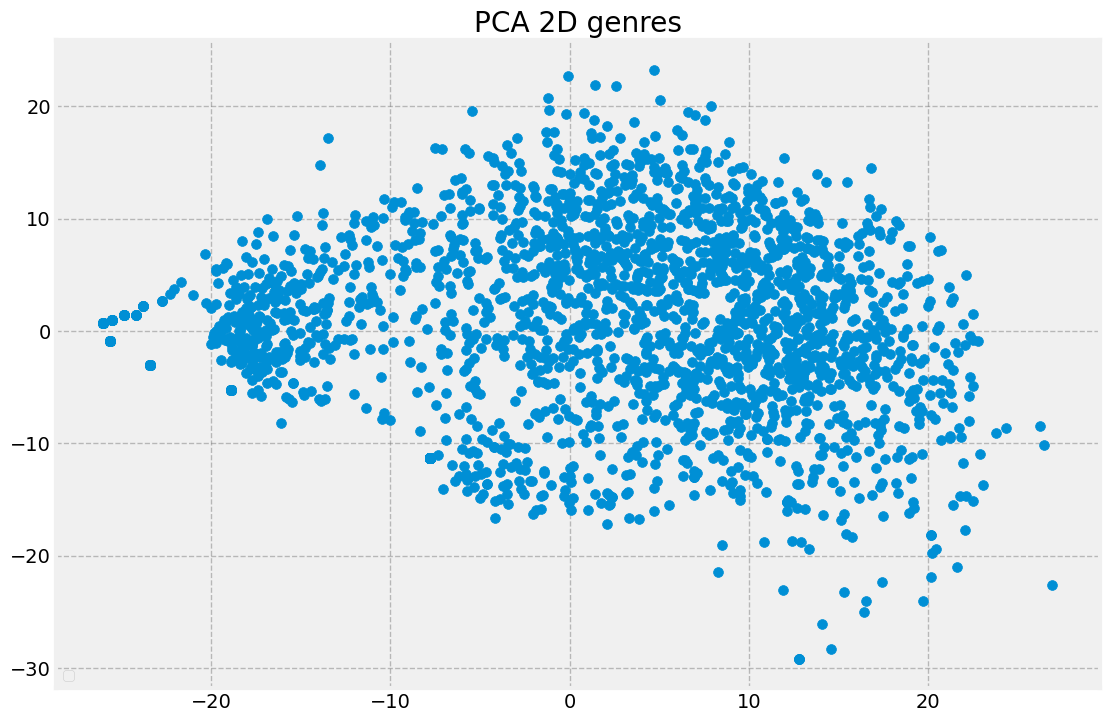

In [318]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_pca[0], df_pca[1], s=50)

ax.set_title('PCA 2D genres')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

The Same as SVD

In [319]:
tsvd2D = TruncatedSVD(n_components=2,random_state=42)
tsvd2D.fit(scaled_emb)
df_SVD=pd.DataFrame(tsvd2D.transform(scaled_emb))

In [372]:
# Сохранение модели с помощью skops
sio.dump(tsvd2D, 'tsvd2D_keywords_model.skops') 

# # Загрузка модели
# loaded_tsvd3D = sio.load('tsvd3D_model.skops') 

In [370]:
kmeans = KMeans(random_state=42, n_clusters=2)
clusters = kmeans.fit_predict(df_SVD)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


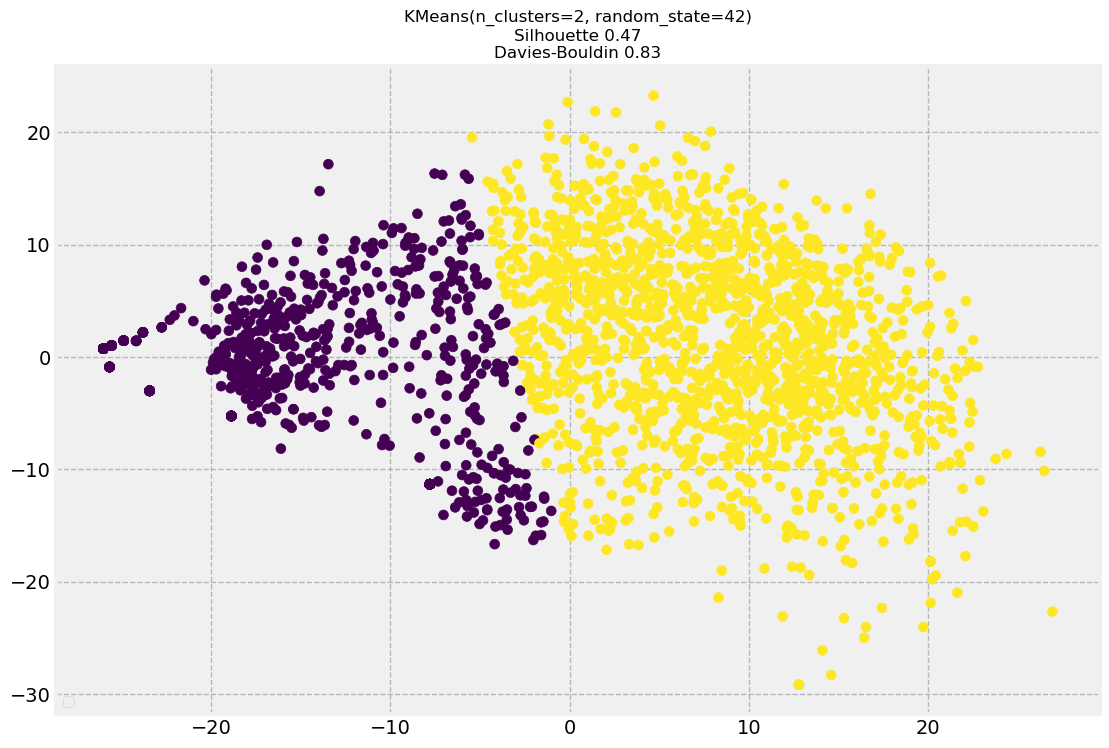

In [371]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_SVD[0], df_SVD[1],  c=clusters,s=50)
ax.set_title(f'{get_metrics(kmeans, df_SVD, clusters)}', size=12)
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [360]:
hdb = hdbscan.HDBSCAN(min_cluster_size=30,min_samples=1,alpha=1.0 )
clusters=hdb.fit_predict(df_SVD)
clusters_df=pd.DataFrame(clusters,columns=['cluster'])
clusters_df.nunique()

cluster    14
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


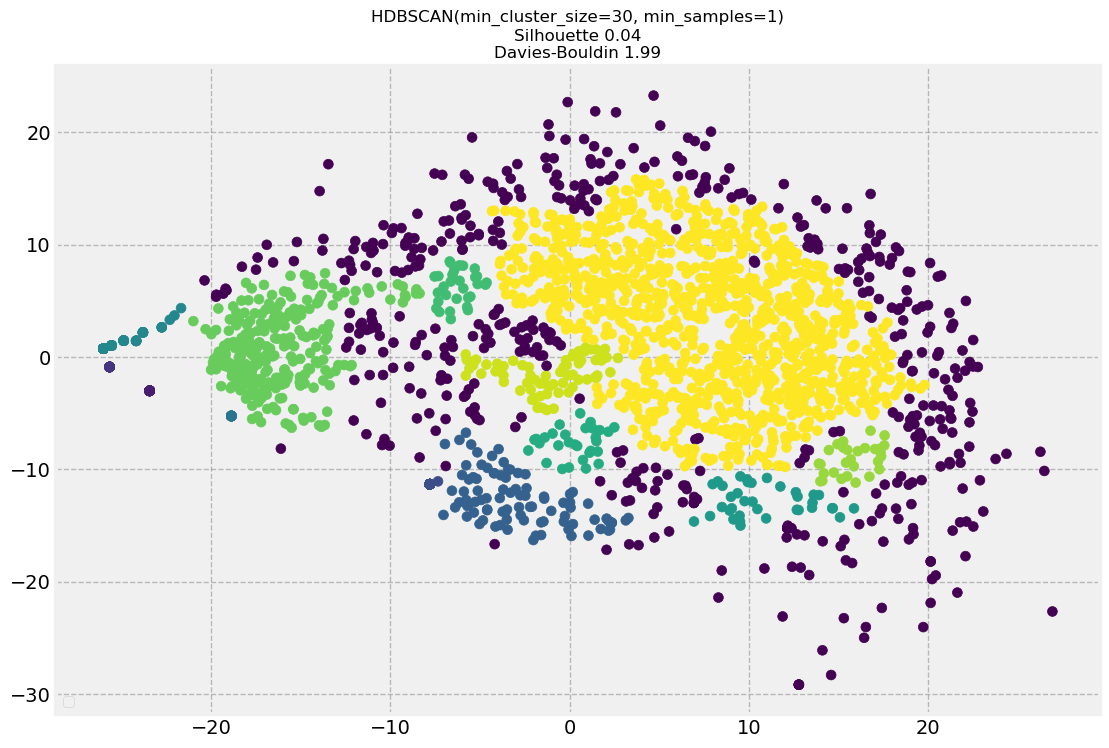

In [361]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_SVD[0], df_SVD[1],  c=clusters,s=50)
ax.set_title(f'{get_metrics(hdb, df_SVD, clusters)}', size=12)
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [373]:
model = AgglomerativeClustering()
model=model.fit(df_SVD)
model

AgglomerativeClustering()

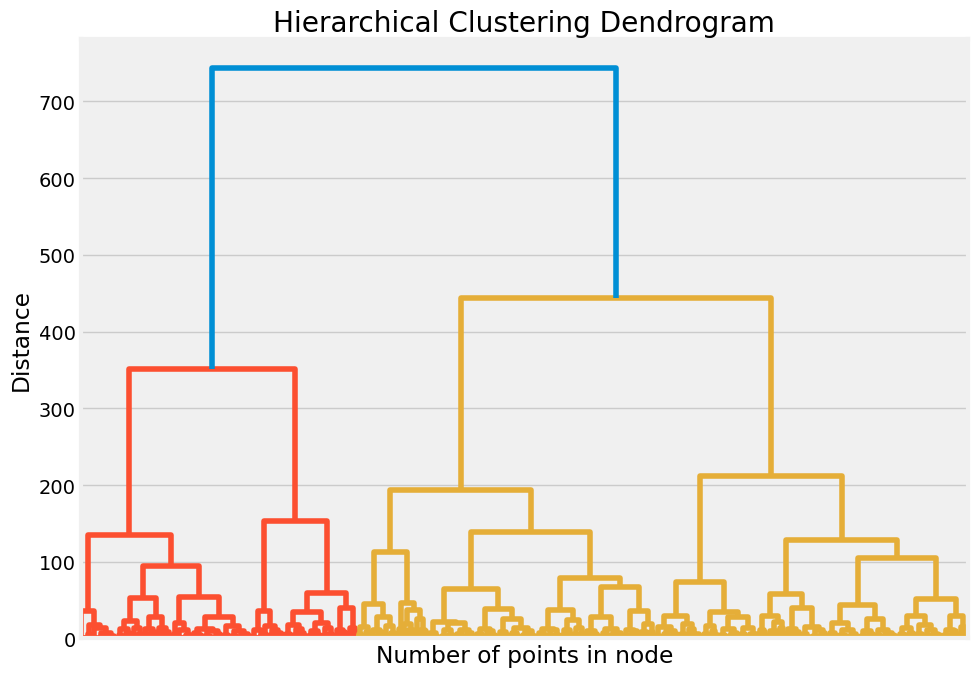

In [374]:
linkage_matrix = linkage(df_SVD, method='ward')

# Dendogram
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    truncate_mode="level",
    p=20,
    show_leaf_counts=True,
    leaf_rotation=90,
    leaf_font_size=6,
    show_contracted=True,
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node")
plt.ylabel("Distance")
# Hide Xticks
plt.xticks([])
plt.tight_layout()
plt.show()

In [375]:
aggcls= AgglomerativeClustering().fit(genres_3D)
clusters = aggcls.fit_predict(genres_3D)
clusters_df=pd.DataFrame(clusters,columns=['cluster'])
clusters_df

cluster
0           0
1           1
2           0
3           0
4           0
...       ...
2532        1
2533        0
2534        0
2535        1
2536        1

[2537 rows x 1 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


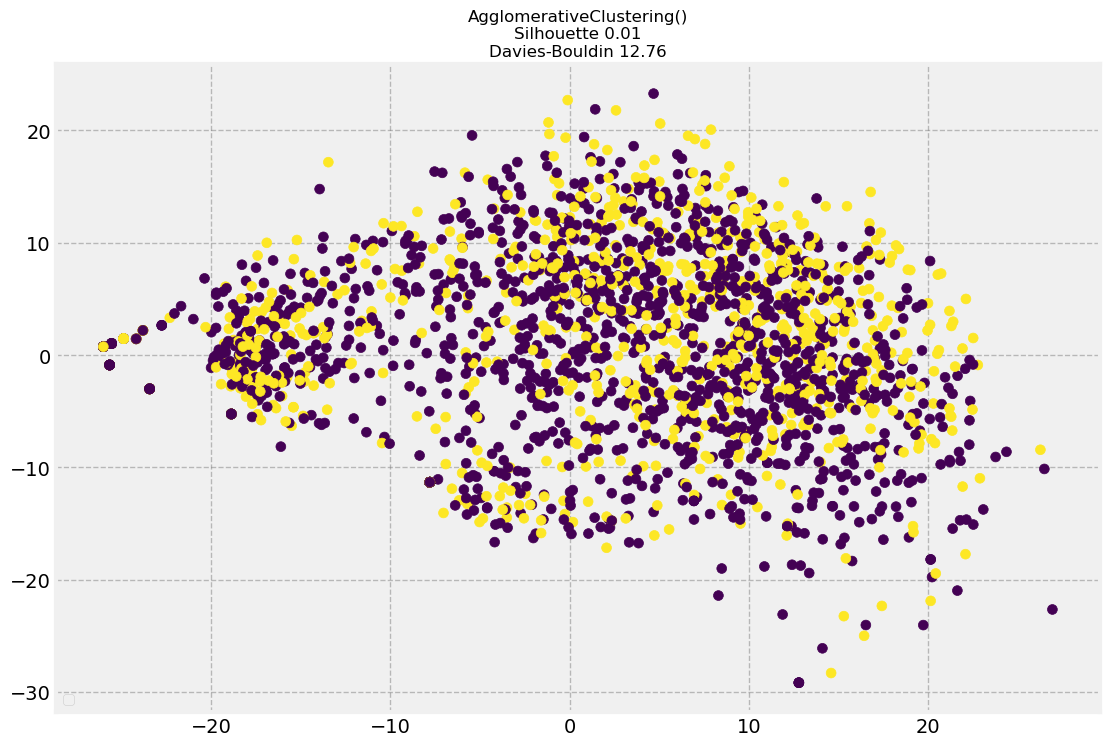

In [377]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(df_SVD[0], df_SVD[1],  c=clusters,s=50)
ax.set_title(f'{get_metrics(aggcls, df_SVD, clusters)}', size=12)
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

Final is K-means

In [378]:
kmeans = KMeans(random_state=42, n_clusters=2)
clusters = kmeans.fit_predict(df_SVD)

In [379]:
# Сохранение модели с помощью skops
sio.dump(kmeans, 'kmeans_keywords_model.skops') 

# # Загрузка модели
# loaded_tsvd3D = sio.load('tsvd3D_model.skops')

In [381]:
clusters_df=pd.DataFrame(clusters)
data = pd.concat([df_SVD,clusters_df], axis=1)
keywords=data
keywords.head()

0          1  0
0  12.052106   9.914565  1
1 -19.184790   6.082438  0
2  -3.689746  -0.817536  0
3  20.795588  -6.392511  1
4   6.337420 -11.446759  1

In [382]:
keywords.columns=['keywords_x1','keywords_x2', 'keywords_cluster']
keywords.head()

keywords_x1  keywords_x2  keywords_cluster
0    12.052106     9.914565                 1
1   -19.184790     6.082438                 0
2    -3.689746    -0.817536                 0
3    20.795588    -6.392511                 1
4     6.337420   -11.446759                 1

Directors now

In [383]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = BertModel.from_pretrained('bert-base-cased').to(device)

In [384]:
tokenized = [tokenizer.encode(x, add_special_tokens=256) for x in tqdm(movies['director'])]
padded = np.array([i + [0]*(256-len(i)) for i in tokenized])
attention_mask = np.where(padded != 0, 1, 0)

100%|██████████| 2537/2537 [00:00<00:00, 8839.99it/s]


In [385]:
input_ids = torch.tensor(padded).to(device)
attention_mask = torch.tensor(attention_mask).to(device)
batch_size = 2
features_list = []
for i in tqdm(range(0, len(input_ids), batch_size)):
    batch_input_ids = input_ids[i:i+batch_size]
    batch_attention_mask = attention_mask[i:i+batch_size]
    with torch.no_grad():
        last_hidden_states = bert_model(batch_input_ids, attention_mask=batch_attention_mask)
    features = last_hidden_states[0][:,0,:].cpu().numpy()
    features_list.append(features)

100%|██████████| 1269/1269 [01:08<00:00, 18.50it/s]


In [386]:
torch.save(bert_model.state_dict(), 'bert_model_finetuned_director.pth')

In [387]:
all_features = np.concatenate(features_list, axis=0)

In [388]:
directors_bert=pd.DataFrame(all_features)

In [389]:
directors_bert.to_csv('directors_bert.csv', index=False)

In [390]:
%%time
scaler = StandardScaler()
scaler.fit(directors_bert)

scaled_emb = scaler.transform(directors_bert)

CPU times: total: 46.9 ms
Wall time: 55 ms


In [398]:
movies.columns

Index(['movieId', 'title', 'id', 'genres', 'cast', 'vote_average', 'director',
       'keywords', 'title_key'],
      dtype='object')

In [401]:
# Получаем список всех режиссеров
list1 = []
for directors in movies['director']:
    list1.extend(directors.split(','))
unique_director = pd.DataFrame(set(list1), columns=['director'])

# Создаем матрицу бинарных признаков для режиссеров
director_matrix = pd.DataFrame(0, index=movies.index, columns=unique_director['director'])
for i, directors in enumerate(movies['director']):
    for director in directors.split(','):
        director_matrix.loc[i, director] = 1

In [402]:
director_matrix

director  Michael Caton-Jones  Shane Acker  Tony Kaye  Mark Pellington  \
0                           0            0          0                0   
1                           0            0          0                0   
2                           0            0          0                0   
3                           0            0          0                0   
4                           0            0          0                0   
...                       ...          ...        ...              ...   
2532                        0            0          0                0   
2533                        0            0          0                0   
2534                        0            0          0                0   
2535                        0            0          0                0   
2536                        0            0          0                0   

director  P.J. Hogan  Richard Fleischer  Kevin Spacey  Rod Lurie  \
0                  0                  0             0          0   
1                  0                  0             0          0   
2                  0                  0             0          0   
3                  0                  0             0          0   
4                  0                  0             0          0   
...              ...                ...           ...        ...   
2532               0                  0             0          0   
2533               0                  0             0          0   
2534               0                  0             0          0   
2535               0                  0             0          0   
2536               0                  0             0          0   

director  Risa Bramon Garcia  Dennie Gordon  ...  Chris Williams  Simon West  \
0                          0              0  ...               0           0   
1                          0              0  ...               0           0   
2                          0              0  ...               0           0   
3                          0              0  ...               0           0   
4                          0              0  ...               0           0   
...                      ...            ...  ...             ...         ...   
2532                       0              0  ...               0           0   
2533                       0              0  ...               0           0   
2534                       0              0  ...               0           0   
2535                       0              0  ...               0           0   
2536                       0              0  ...               0           0   

director  Thomas Vinterberg  Steven Quale  Jeremy Saulnier  George Roy Hill  \
0                         0             0                0                0   
1                         0             0                0                0   
2                         0             0                0                0   
3                         0             0                0                0   
4                         0             0                0                0   
...                     ...           ...              ...              ...   
2532                      0             0                0                0   
2533                      0             0                0                0   
2534                      0             0                0                0   
2535                      0             0                0                0   
2536                      0             0                0                0   

director  Nick Hamm  Gary Fleder  Kevin Allen  Kevin Greutert  
0                 0            0            0               0  
1                 0            0            0               0  
2                 0            0            0               0  
3                 0            0            0               0  
4                 0            0            0               0  


Too many directors

In [391]:
tsvd2D = TruncatedSVD(n_components=2,random_state=42)
tsvd2D.fit(scaled_emb)
df_SVD=pd.DataFrame(tsvd2D.transform(scaled_emb))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


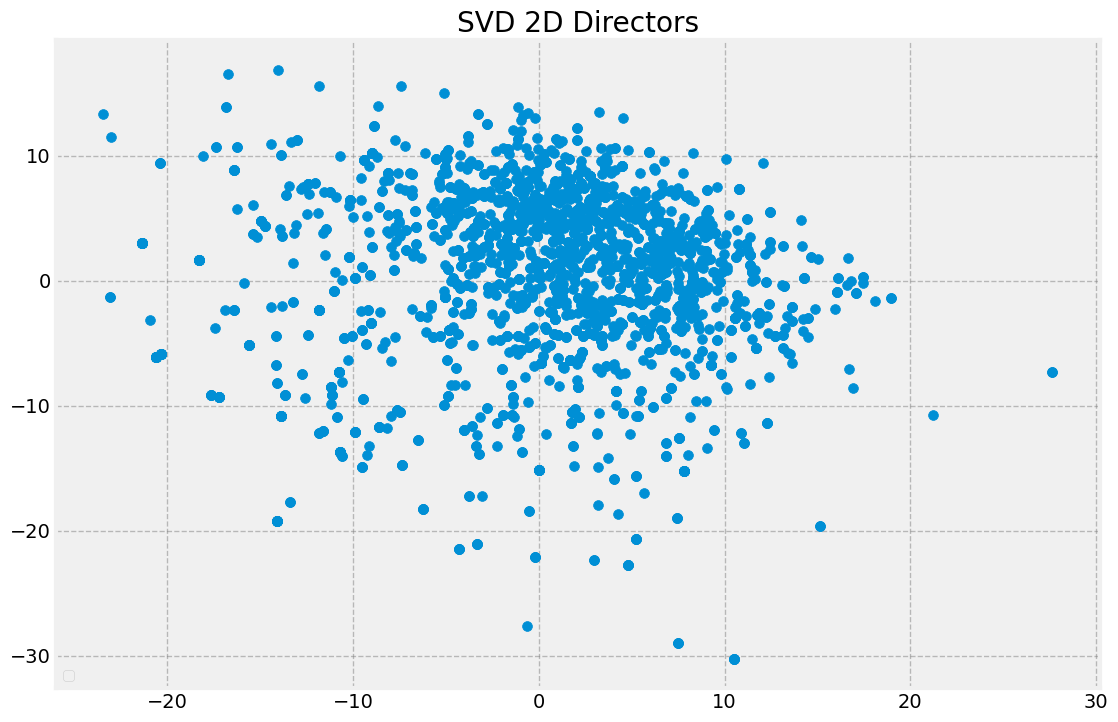

In [392]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(df_SVD[0], df_SVD[1], s=50)

ax.set_title('SVD 2D Directors')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [393]:
tsvd3D = TruncatedSVD(n_components=3,random_state=42)
tsvd3D.fit(scaled_emb)
data=pd.DataFrame(tsvd3D.transform(scaled_emb))

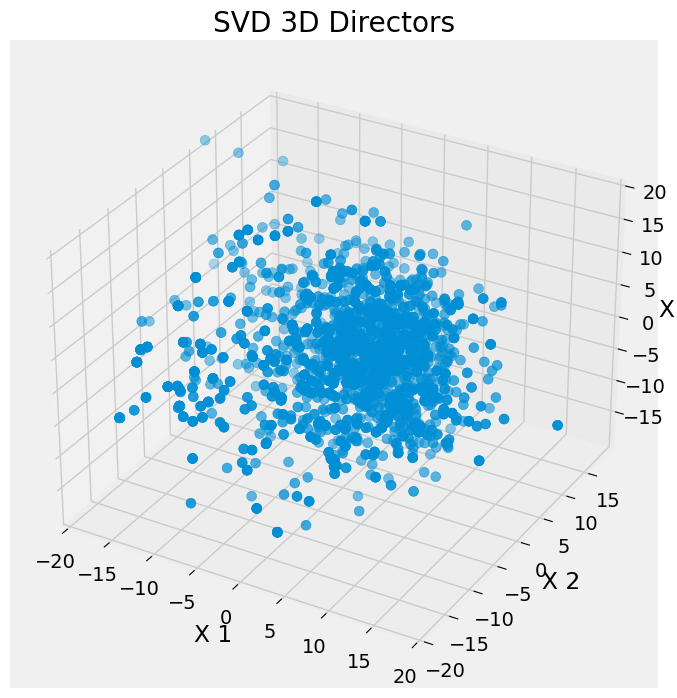

In [394]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius =20# Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
ax.scatter(data[0], data[1], data[2], s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title('SVD 3D Directors')
plt.show()

In [406]:
fit = umap.UMAP(random_state=42)
%time u2D = fit.fit_transform(scaled_emb)
df_U=pd.DataFrame(u2D)

CPU times: total: 10.1 s
Wall time: 9.73 s


In [407]:
df_U.shape

(2537, 2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


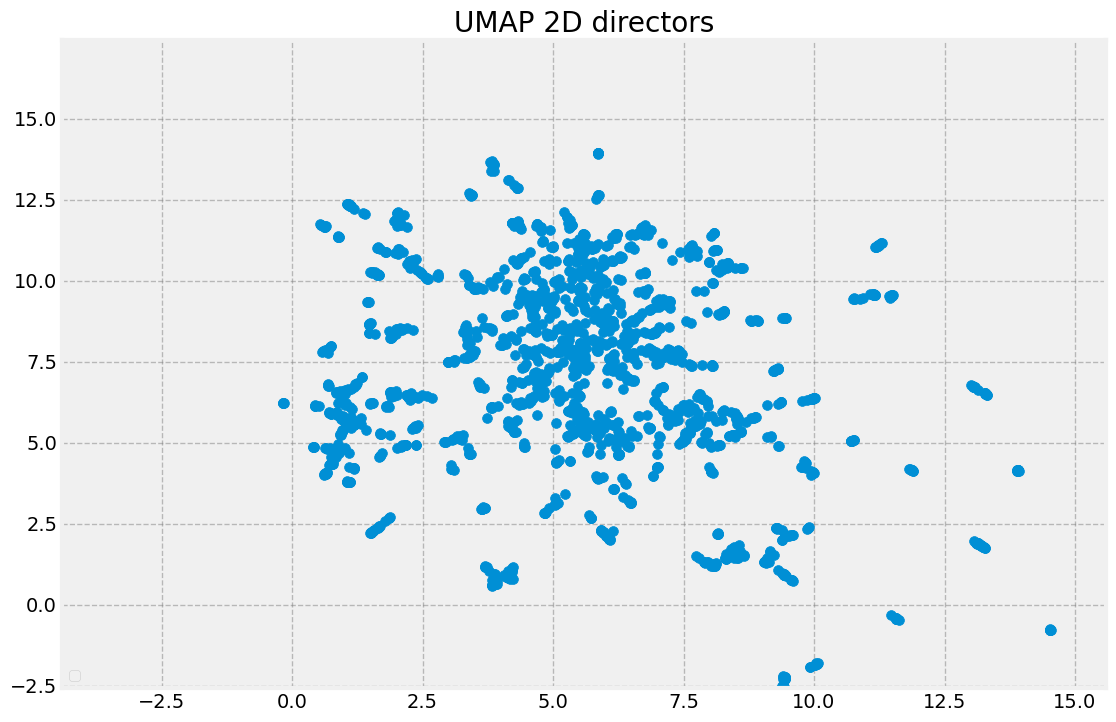

In [408]:
data = df_U
fig, ax = plt.subplots(figsize=(12, 8))
x_center = data[0].median()
y_center = data[1].median()
# Установите радиус вокруг центральной точки
radius = 10 # Это значение можно настроить
# Установите границы для каждой оси
plt.xlim(x_center - radius, x_center + radius)
plt.ylim(y_center - radius, y_center + radius)
ax.scatter(data[0], data[1],  s=50)
ax.set_title('UMAP 2D directors')
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [403]:
fit = umap.UMAP(n_components=3, random_state=42)
%time df_U=pd.DataFrame(fit.fit_transform(scaled_emb))

CPU times: total: 10.8 s
Wall time: 10.5 s


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


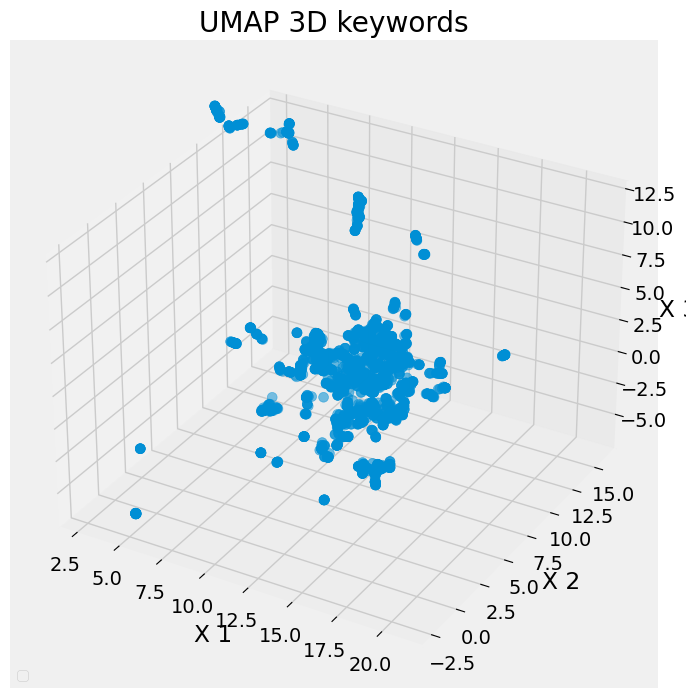

In [405]:
data = df_U
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Определяем центр 3D плоскости
x_center = data[0].mean()
y_center = data[1].mean()
z_center = data[2].mean()

# Устанавливаем радиус вокруг центральной точки
radius = 10 # Это значение можно настроить

# Устанавливаем границы для каждой оси
ax.set_xlim(x_center - radius, x_center + radius)
ax.set_ylim(y_center - radius, y_center + radius)
ax.set_zlim(z_center - radius, z_center + radius)

# Раскрашиваем точки по жанрам
ax.scatter(data[0], data[1], data[2], s=50)
ax.set_xlabel('X 1')
ax.set_ylabel('X 2')
ax.set_zlabel('X 3')
ax.set_title('UMAP 3D keywords')
ax.legend(loc='lower left', fontsize=10)
plt.show()

UMAP 2D seems OK

In [409]:
Umap = umap.UMAP(random_state=42)
%time u2D = Umap.fit_transform(scaled_emb)
df_U=pd.DataFrame(u2D)

CPU times: total: 10.9 s
Wall time: 10.7 s


In [410]:
Umap

UMAP(random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [411]:
joblib.dump(Umap, 'Umap2D_director_model.joblib')

['Umap2D_director_model.joblib']

In [472]:
kmeans = KMeans(random_state=42, n_clusters=60)
clusters = kmeans.fit_predict(df_U)

In [473]:
data = df_U

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


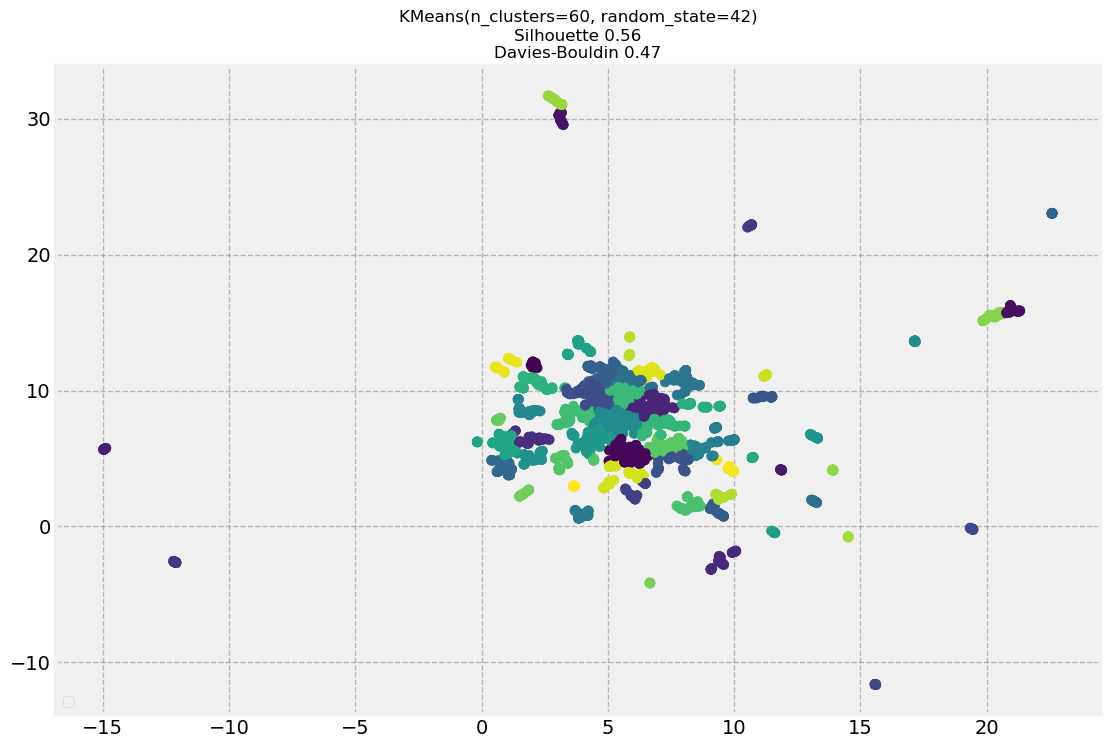

In [474]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data[0], data[1],  c=clusters,s=50)
ax.set_title(f'{get_metrics(kmeans, data, clusters)}', size=12)
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [446]:
hdb = hdbscan.HDBSCAN(min_cluster_size=15,min_samples=5,alpha=1.0 )
clusters=hdb.fit_predict(df_U)
clusters_df=pd.DataFrame(clusters,columns=['cluster'])
clusters_df.nunique()

cluster    72
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


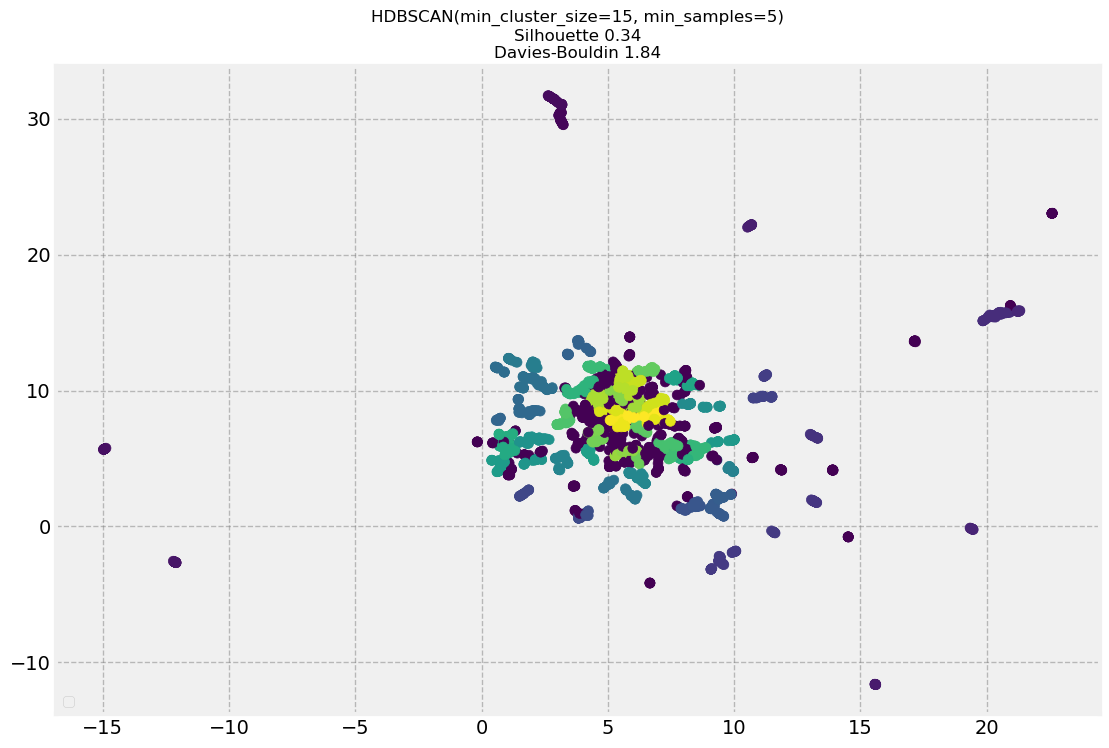

In [447]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(data[0], data[1],  c=clusters,s=50)
ax.set_title(f'{get_metrics(hdb, data, clusters)}', size=12)
ax.legend(loc='lower left', fontsize=10)
plt.grid(True, linestyle='--', color='grey', alpha=0.5)
plt.rcParams['figure.facecolor'] = 'white'
plt.show()

In [478]:
kmeans = KMeans(random_state=42, n_clusters=2)
clusters = kmeans.fit_predict(df_U)

In [479]:
# Сохранение модели с помощью skops
sio.dump(kmeans, 'kmeans_directors_model.skops') 

# # Загрузка модели
# loaded_tsvd3D = sio.load('tsvd3D_model.skops')

In [480]:
clusters_df=pd.DataFrame(clusters)
data = pd.concat([df_U,clusters_df], axis=1)
directors=data
directors.head()

0          1  0
0   2.915014   5.009351  0
1   6.993984   4.241862  1
2   2.841570  31.452574  0
3  13.243169   1.783696  1
4   3.150442  31.063261  0

In [481]:
directors.columns=['directors_x1','directors_x2', 'directors_cluster']
directors.head()

directors_x1  directors_x2  directors_cluster
0      2.915014      5.009351                  0
1      6.993984      4.241862                  1
2      2.841570     31.452574                  0
3     13.243169      1.783696                  1
4      3.150442     31.063261                  0

In [484]:
movies

movieId                    title      id  \
0           1         Toy Story (1995)     862   
1          10         GoldenEye (1995)     710   
2          14             Nixon (1995)   10858   
3          15  Cutthroat Island (1995)    1408   
4          16            Casino (1995)     524   
...       ...                      ...     ...   
2532   161127   The Infiltrator (2016)  325789   
2533   161580          Bad Moms (2016)  376659   
2534   173197        The Square (2017)  159037   
2535   180263       The Shining (1997)     694   
2536   186587           Rampage (2018)   38780   

                                genres  \
0          [Animation, Comedy, Family]   
1        [Action, Adventure, Thriller]   
2                     [Drama, History]   
3                  [Action, Adventure]   
4                       [Crime, Drama]   
...                                ...   
2532          [Crime, Drama, Thriller]   
2533                          [Comedy]   
2534     [Documentary, Drama, History]   
2535                [Horror, Thriller]   
2536  [Action, Crime, Drama, Thriller]   

                                                   cast  vote_average  \
0           [DonRickles, JimVarney, TimAllen, TomHanks]           7.7   
1     [FamkeJanssen, IzabellaScorupco, PierceBrosnan...           6.6   
2     [AnthonyHopkins, EdHarris, JoanAllen, PowersBo...           7.1   
3     [FrankLangella, GeenaDavis, MatthewModine, Mau...           5.7   
4     [JamesWoods, JoePesci, RobertDeNiro, SharonStone]           7.8   
...                                                 ...           ...   
2532  [BryanCranston, DanielMays, DianeKruger, JohnL...           6.6   
2533  [ChristinaApplegate, KathrynHahn, KristenBell,...           6.3   
2534  [DinaAbdullah, DinaAmer, KhalidAbdalla, MagdyA...           7.8   
2535  [DannyLloyd, JackNicholson, ScatmanCrothers, S...           8.1   
2536  [BrendanFletcher, LyndaBoyd, MichaelParé, Shau...           6.0   

             director                                           keywords  \
0       John Lasseter  [boy, boynextdoor, friends, friendship, jealou...   
1     Martin Campbell  [computervirus, cossack, cuba, ejectionseat, e...   
2        Oliver Stone  [biography, government, historicalfigure, pres...   
3        Renny Harlin  [exoticisland, map, pirate, scalp, ship, treas...   
4     Martin Scorsese  [1970s, drugabuse, illegalprostitution, overdo...   
...               ...                                                ...   
2532      Brad Furman            [biography, drug, druglord, undercover]   
2533        Jon Lucas  [alcohol, bar, bathroomhumor, divorce, family,...   
2534   Jehane Noujaim                                    [womandirector]   
2535  Stanley Kubrick  [alcoholic, ax, bartender, caretaker, colorado...   
2536         Uwe Boll                  [killingspree, massacre, rampage]   

            title_key  
0            toystory  
1           goldeneye  
2               nixon  
3     cutthroatisland  
4              casino  
...               ...  
2532   theinfiltrator  
2533          badmoms  
2534        thesquare  
2535       theshining  
2536          rampage  

[2537 rows x 9 columns]

Now we get full dataset

In [483]:
movies.shape, directors.shape , genres.shape, cast.shape, keywords.shape

((2537, 9), (2537, 3), (2537, 4), (2537, 3), (2537, 3))

In [511]:
movies.title.to_excel('movies_title.xlsx', index=False)

In [516]:
titles_ru=pd.read_excel('movies_title_ru.xlsx')

In [517]:
titles_ru

заголовок
0         История игрушек (1995)
1            Золотой глаз (1995)
2                  Никсон (1995)
3      Остров головорезов (1995)
4                  Казино (1995)
...                          ...
2532         Инфильтратор (2016)
2533       Плохие мамочки (2016)
2534              Площадь (2017)
2535               Сияние (1997)
2536              Буйство (2018)

[2537 rows x 1 columns]

In [520]:
data=pd.concat([titles_ru,movies, directors , genres ,cast, keywords],axis=1)

In [524]:
data.to_csv('full_data.csv',index=False)

In [ ]:
data=pd.read

In [525]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   заголовок          2537 non-null   object 
 1   movieId            2537 non-null   int64  
 2   title              2537 non-null   object 
 3   id                 2537 non-null   int64  
 4   genres             2537 non-null   object 
 5   cast               2537 non-null   object 
 6   vote_average       2537 non-null   float64
 7   director           2537 non-null   object 
 8   keywords           2537 non-null   object 
 9   title_key          2537 non-null   object 
 10  title_ru           2537 non-null   object 
 11  directors_x1       2537 non-null   float32
 12  directors_x2       2537 non-null   float32
 13  directors_cluster  2537 non-null   int32  
 14  genre_x1           2537 non-null   float32
 15  genre_x2           2537 non-null   float32
 16  genre_x3           2537 